Movie Industry Dataset

Kaggle:  https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download

# Import libraries

In [735]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg

# Import the dataset

In [2]:
df = pd.read_csv(r'C:\Users\aplor\Desktop\PYTHON_PRO_1\Projects\Movie Industry\movies.csv')

### the dataframe - top 5 rows

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

Feature definition (from Kaggle):

- budget: the budget of a movie.
- company: the production company
- country: country of origin
- director: the director
- genre: main genre of the movie.
- gross: revenue of the movie
- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- released: release date (YYYY-MM-DD)
- runtime: duration of the movie
- score: IMDb user rating
- votes: number of user votes
- star: main actor/actress
- writer: writer of the movie
- year: year of release

# Exploratory data analysis (EDA)

In [4]:
# shape of the dataset, records and features

print(f'records: {df.shape[0]}')
print(f'features: {df.shape[1]}')

records: 7668
features: 15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [7]:
percent_null_per_column = df.isnull().mean() * 100
percent_null_per_column = percent_null_per_column.round(3)

print(percent_null_per_column)

name         0.000
rating       1.004
genre        0.000
year         0.000
released     0.026
score        0.039
votes        0.039
director     0.000
writer       0.039
star         0.013
country      0.039
budget      28.312
gross        2.465
company      0.222
runtime      0.052
dtype: float64


# Clean the data

## budget

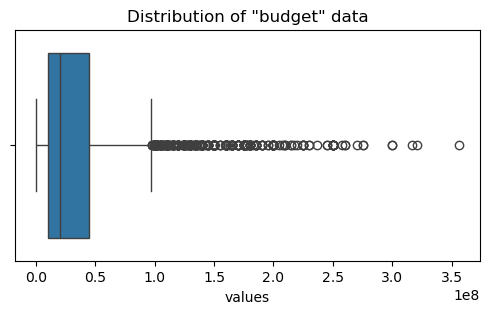

In [8]:
# The budget column has a large amount of null values. Simply dropping the rows with null 
# values would eliminate over 28% of the data.  Will look at the distribution to get a better
# idea of how to handle these missing values.

plt.figure(figsize=(6,3))
sns.boxplot(x = df['budget'])
plt.title('Distribution of "budget" data')
plt.xlabel('values')
plt.show()

In [9]:
# There are a large number of outliers in the budget data.  
# So, I will likely impute missing values with the median since the many outliers will perturb the mean. 

# Additionally, a more targeted imputation would be based on the movie genres. Movie genres such 
# as action, fantasy, and animation likely have higher budgets than comedies, etc. 

# First, take a look at the median budget for each genre:

genre_median_budget = df.groupby('genre')['budget'].median()

print(genre_median_budget)

genre
Action       40000000.0
Adventure    25000000.0
Animation    70000000.0
Biography    20000000.0
Comedy       17000000.0
Crime        15000000.0
Drama        15000000.0
Family       17000000.0
Fantasy       9000000.0
History        323562.0
Horror        8750000.0
Music               NaN
Musical             NaN
Mystery      24000000.0
Romance      22000000.0
Sci-Fi       13000000.0
Sport               NaN
Thriller      8000000.0
Western      10500000.0
Name: budget, dtype: float64


In [10]:
# Several genres (Music, Musical, and Sport) show NaN values, which suggests that all values
# in the budget column for these rows are missing.  I will verify that this is true. 

print(df[df['genre'].isin(['Music','Musical','Sport'])]['budget'])

162    NaN
7600   NaN
7613   NaN
7617   NaN
Name: budget, dtype: float64


In [11]:
# The output above verifies that all budget values for the Music, Musical, and Sport genres 
# are missing.  Additinally, there are very few rows for these genres.  I will perform one more 
# verification by outputing the percent of NaN values for budget per genre.

# Calculate NaN percent per genre for the budget column

nan_percent_per_genre = df.groupby('genre')['budget'].apply(lambda x: 
                                                           x.isna().mean() * 100)
print(nan_percent_per_genre)

genre
Action        16.304985
Adventure     22.950820
Animation     17.455621
Biography     28.893905
Comedy        32.739421
Crime         26.497278
Drama         42.028986
Family        63.636364
Fantasy        4.545455
History        0.000000
Horror        18.012422
Music        100.000000
Musical      100.000000
Mystery       15.000000
Romance       50.000000
Sci-Fi        20.000000
Sport        100.000000
Thriller      43.750000
Western       33.333333
Name: budget, dtype: float64


In [12]:
# Strategy for imputing missing budget values for all genres:

# 1. Although there are few rows of Music, Musical, and Sport genres, I will impute the missing 
# budget values with 0 to preserve the remaining feature data for these rows.  This will need 
# to be noted in future targeted exploration of the data involving budget.  

genre_median_budget.loc[['Music','Musical','Sport']] = 0

# 2. There are substantial differences in median budget per genre.  For example, history has a 
# buget of 323,562 while animation has a median budget of 50,000,000.  So, I will impute missing
# budget values with the median of the specific genre's budget.

df.loc[df['budget'].isna(), 'budget'] = df['genre'].map(genre_median_budget)

df['budget'].isnull().sum()

0

## gross

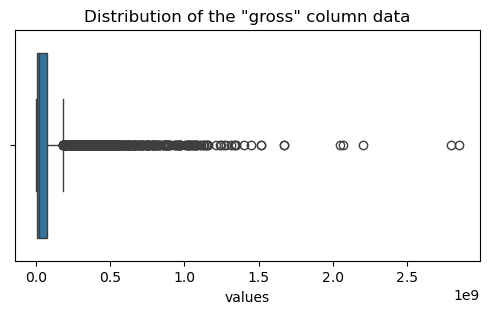

In [13]:
# Inspect the distribution of the gross column.  

plt.figure(figsize=(6,3))
sns.boxplot(x = df['gross'])
plt.title('Distribution of the "gross" column data')
plt.xlabel('values')
plt.show()

In [14]:
# The gross column also has substantial outlieers, but only ~2.5% missing values. 
# For similar reasons decribed for budget, I will attempt to impute with the genre-specific 
# median value rather than discarding these records.

genre_median_gross = df.groupby('genre')['gross'].median()

print(genre_median_gross)

genre
Action        51386477.0
Adventure     27989799.0
Animation    139804348.0
Biography     18598607.0
Comedy        16373597.0
Crime         12239344.5
Drama          8463058.5
Family         9979683.0
Fantasy       19595031.0
History              NaN
Horror        20471382.0
Music           110014.0
Musical        2595346.0
Mystery       19255503.5
Romance        5481689.0
Sci-Fi         7974206.5
Sport          1067629.0
Thriller      12105479.0
Western       12000000.0
Name: gross, dtype: float64


In [15]:
# Similar to what was observed for budget, the genre-specific median gross values are quite 
# varied.  So, it makes sense to impute missing gross values with the median of the resepctive
# genre.

# The gross value for the History genre will be imputed with 0 to preserve the remaing feature data. 

genre_median_gross.loc[['History']] = 0

df.loc[df['gross'].isna(), 'gross'] = df['genre'].map(genre_median_gross)

df['gross'].isnull().sum()                                 

0

## rating

In [16]:
# Fill in null values of the rating column.  I will impute missing rating values with the mode
# of the specific genre of that movie.  

# first, determine the mode of each genre
genre_mode = df.groupby('genre')['rating'].agg(lambda x: x.mode()[0] 
                                               if not x.mode().empty
                                               else None)
print(genre_mode)

genre
Action               R
Adventure           PG
Animation           PG
Biography            R
Comedy               R
Crime                R
Drama                R
Family              PG
Fantasy              R
History           None
Horror               R
Music                R
Musical      Not Rated
Mystery              R
Romance             PG
Sci-Fi           PG-13
Sport            PG-13
Thriller             R
Western              R
Name: rating, dtype: object


In [17]:
# fill missing "rating" values with the mode of the respective genre

df['rating'] = df.apply(lambda row: genre_mode[row['genre']] 
                        if pd.isnull(row['rating']) else row['rating'], axis=1)

df['rating'].isnull().sum()

1

In [18]:
print(df[df['rating'].isnull()])

                              name rating    genre  year  \
474  The Business of Show Business   None  History  1983   

                       released  score  votes   director     writer star  \
474  February 15, 1983 (Canada)    8.3   79.0  Tom Logan  Tom Logan  NaN   

    country    budget  gross company  runtime  
474  Canada  323562.0    0.0     CTV     55.0  


In [19]:
# Apparently, the only movie in the History genre is "The Business of Show Business".  
# I was not able to find the original rating on the internet, so am gong to change its null 
# value to 'Not Rated'.  

df.loc[df['name'] == 'The Business of Show Business', 'rating'] = 'Not Rated'
df['rating'].isnull().sum()

0

## company

In [20]:
# I will impute company column null values with the mode based on genre as I had done 
# with rating.  Producation companies tend to specialize in specific genres, so this seems
# like a reasonable way to fill in the missing data.

genre_mode_company = df.groupby('genre')['company'].agg(lambda x: x.mode()[0]
                                                        if not x.mode().empty
                                                        else None)

print(genre_mode_company)

genre
Action                                Warner Bros.
Adventure                     Walt Disney Pictures
Animation                     Walt Disney Pictures
Biography                       Universal Pictures
Comedy                          Universal Pictures
Crime                           Paramount Pictures
Drama                                 Warner Bros.
Family                       Aristar Entertainment
Fantasy                            New Line Cinema
History                                        CTV
Horror                             Dimension Films
Music                            Les Films Galaxie
Musical                                 BroadwayHD
Mystery                          Columbia Pictures
Romance                                   CB Films
Sci-Fi                     An Impulsive Production
Sport                            ESX Entertainment
Thriller                               Screen Gems
Western      Incorporated Television Company (ITC)
Name: company, dtype: obj

In [21]:
# fill missing "company" values with the mode of the respective genre

df['company'] = df.apply(lambda row: genre_mode_company[row['genre']] 
                        if pd.isnull(row['company']) else row['company'], axis=1)

df['company'].isnull().sum()

0

## runtime

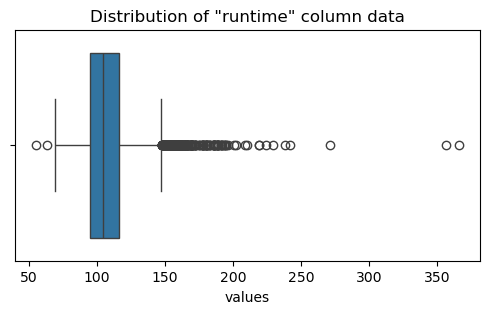

In [22]:
# runtime has only ~0.05% null values.  But, it will be easy to impute these values.

# first, inspect the distribution

plt.figure(figsize=(6,3))
sns.boxplot(x = df['runtime'])
plt.title('Distribution of "runtime" column data')
plt.xlabel('values')
plt.show()

In [23]:
# I will impute the missing values with the median based on the genre

# generate the median runtime values per genre

genre_median_runtime = df.groupby('genre')['runtime'].median()

print(genre_median_runtime)

genre
Action       107.0
Adventure    103.0
Animation     91.0
Biography    117.0
Comedy       100.0
Crime        108.0
Drama        109.0
Family        94.0
Fantasy       95.5
History       55.0
Horror        94.5
Music        117.0
Musical      145.0
Mystery      114.0
Romance      109.0
Sci-Fi       102.0
Sport         94.0
Thriller     100.5
Western       91.0
Name: runtime, dtype: float64


In [24]:
# impute null runtime values with median runtime values per genre

df.loc[df['runtime'].isna(), 'runtime'] = df['genre'].map(genre_median_runtime)

df['runtime'].isnull().sum()

0

## score

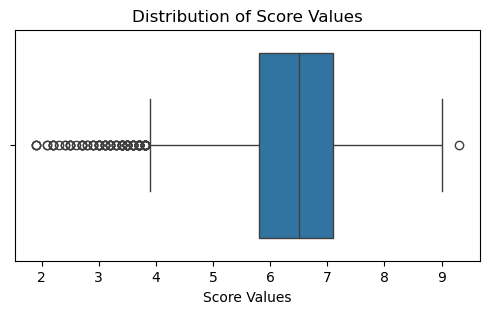

In [25]:
# score has ~0.039% null values. 

# inspect the distribution

plt.figure(figsize=(6,3))
sns.boxplot(x = df['score'])
plt.xlabel('Score Values')
plt.title('Distribution of Score Values')
plt.show()

In [26]:
# generate the median score values per genre

genre_median_score = df.groupby('genre')['score'].median()

print(genre_median_score)

genre
Action       6.20
Adventure    6.40
Animation    6.80
Biography    7.10
Comedy       6.30
Crime        6.70
Drama        6.70
Family       6.30
Fantasy      6.05
History      8.30
Horror       5.80
Music        7.20
Musical      8.05
Mystery      6.65
Romance      6.55
Sci-Fi       6.10
Sport        5.90
Thriller     6.15
Western      5.50
Name: score, dtype: float64


In [27]:
# impute the missing values with the median score per genre

df.loc[df['score'].isna(), 'score'] = df['genre'].map(genre_median_score)

df['score'].isnull().sum()

0

# Analyze the cleaned data

## distribution of numeric data

In [28]:
numeric_df = df.select_dtypes(include=['number']).drop(columns=['year'])
list(numeric_df.columns)

['score', 'votes', 'budget', 'gross', 'runtime']

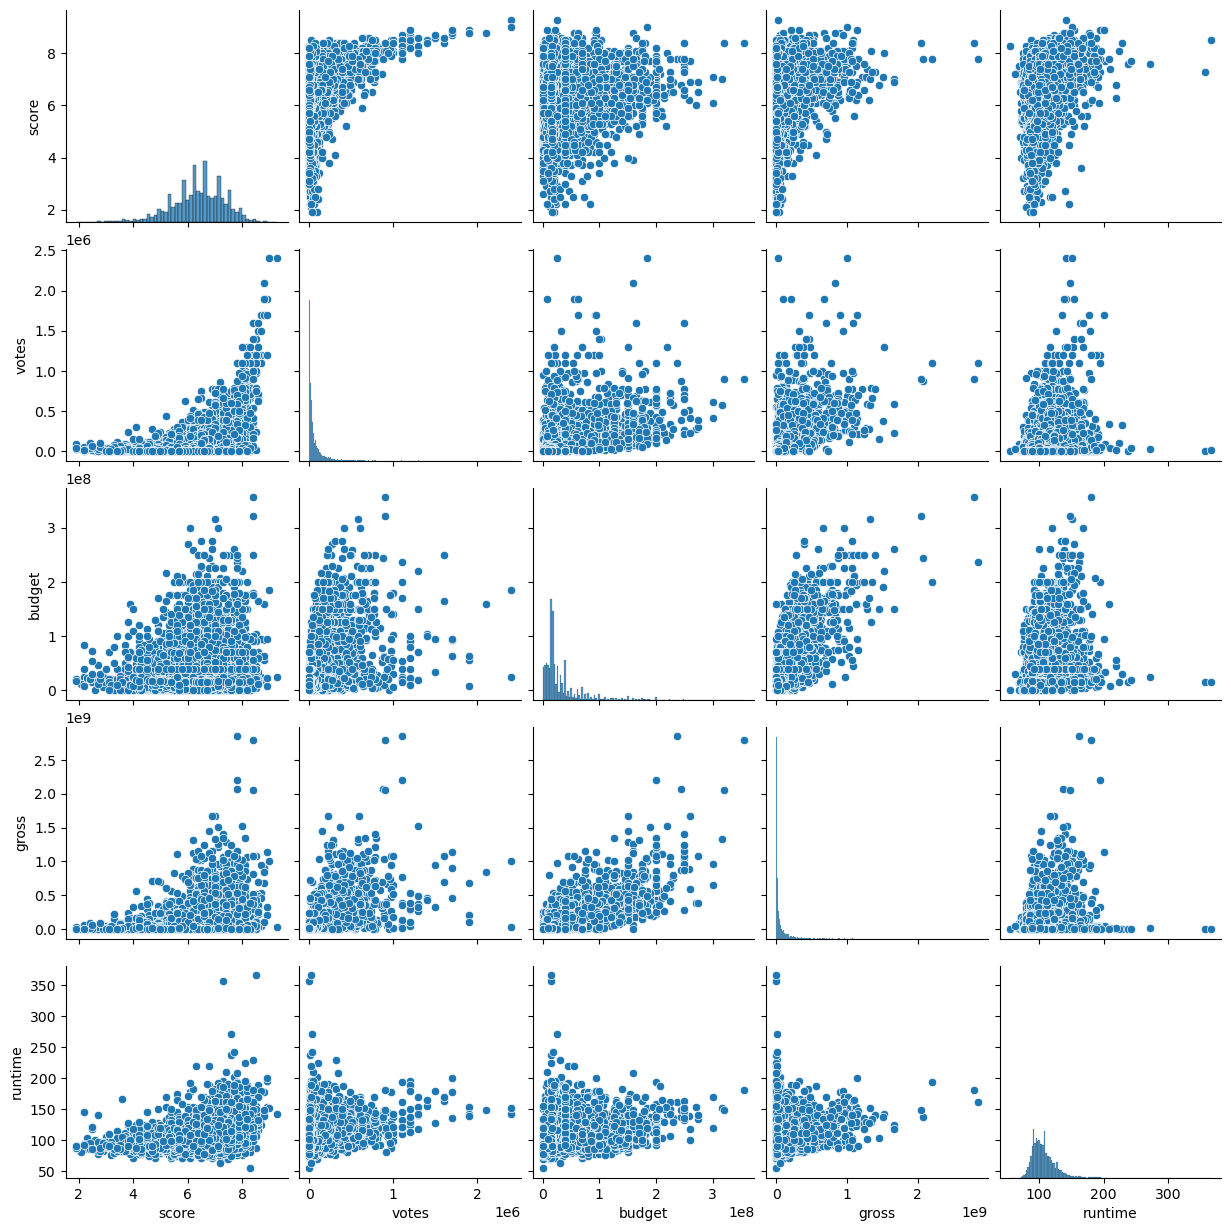

In [29]:
# pairplot to investigate distribution of numeric data

sns.pairplot(numeric_df)
plt.show()

Some quick observations of the pairplots:
- votes vs score - the heavily left-skewed distribution shows that the highest scoring movies get the most votes.

- budget vs score - the movies with the higher budgets tend to get the best scores.

- gross vs score - similarly, the movies with the higher scores tend to have the highest gross revenue.

- runtime vs score - higher scores tend to favor movies with greater runtime.  It seems that people generally perfer longer movies.

- possible correlation between gross and budget.  This is the most linear trend of the pairplots.  I will investigate this more carefully later in this process/notebook.  

Distributions:
- Score has the most normal distribution of the numeric features.  The other features don't look normally distributed.  I will run a QQ plot to confirm.  

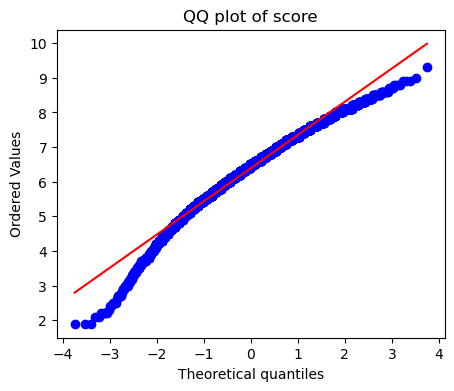

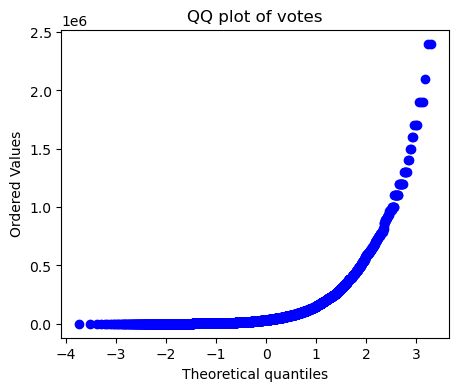

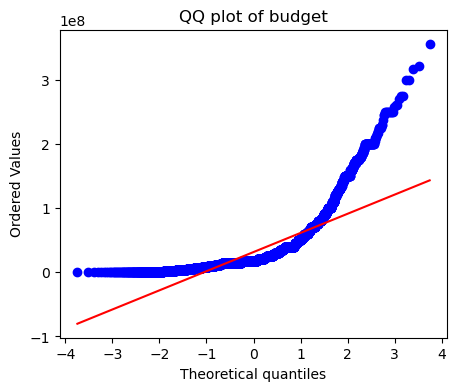

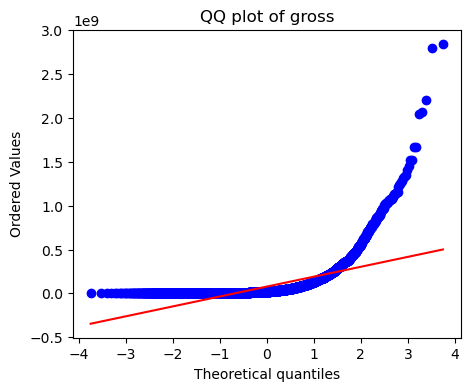

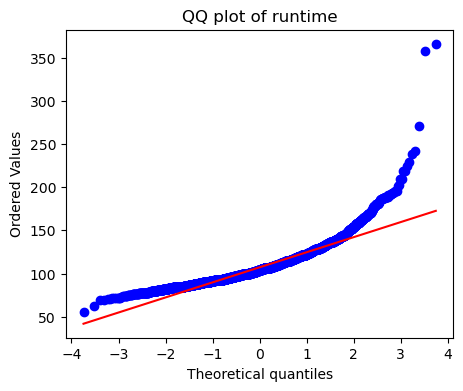

In [30]:
# QQ plot to assess whether specific features follow a normal distribution

for col in numeric_df.columns:
    plt.figure(figsize=(5,4))
    stats.probplot(numeric_df[col], dist='norm', plot=plt)
    plt.title(f'QQ plot of {col}')
    plt.show()

The QQ plots confirm that none of the features with numeric data are normally distributed.  The score data is the closest to normal, followed by runtime, consistent with pairplot observations.  All of the other features have data that is U-shaped indicating heavy tailed distributions and possibly outliers. Both of these qualities can be seen in the pairplots and the boxplots, respectively.  

The non-normal distributions and many outliers suggests that non-parametric statistical tests will need to be applied, where necessary.  

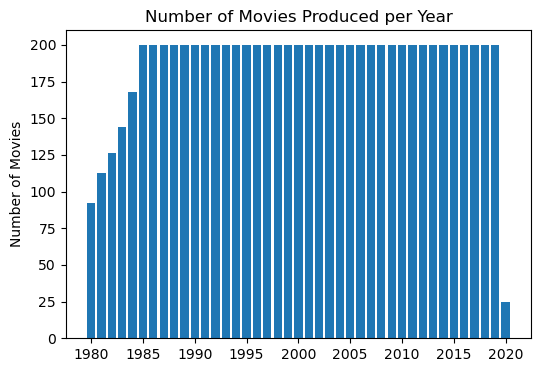

In [725]:
# I will take a look at the distributions of movies per year, since I left
# the year feature out of the pairplot.

# number of movies released per year

movies_per_year = df['year'].value_counts().sort_index()

# plot
plt.figure(figsize=(6,4))
plt.bar(movies_per_year.index, movies_per_year.values)
plt.ylabel('Number of Movies')
plt.title('Number of Movies Produced per Year')
plt.show()

In [728]:
df_movies_per_year = movies_per_year.loc[1980:2020].reset_index()
df_movies_per_year.columns = ['year', 'total movies']
print(df_movies_per_year)

    year  total movies
0   1980            92
1   1981           113
2   1982           126
3   1983           144
4   1984           168
5   1985           200
6   1986           200
7   1987           200
8   1988           200
9   1989           200
10  1990           200
11  1991           200
12  1992           200
13  1993           200
14  1994           200
15  1995           200
16  1996           200
17  1997           200
18  1998           200
19  1999           200
20  2000           200
21  2001           200
22  2002           200
23  2003           200
24  2004           200
25  2005           200
26  2006           200
27  2007           200
28  2008           200
29  2009           200
30  2010           200
31  2011           200
32  2012           200
33  2013           200
34  2014           200
35  2015           200
36  2016           200
37  2017           200
38  2018           200
39  2019           200
40  2020            25


This is an odd, and unexpected finding.  It seems that the dataset has been artificially capped at 200 movies per year.  So, I will need to be careful about the analysis going forward.  I will likely use the mean values, such as average budget per movie instead of total budgets, etc.  

# Functions for analyses

In [478]:
# function for plotting bar charts with SEM
def barplot_with_error(data, iv_col, dv_col, error_type='sem', title='', xlabel='', 
                     xlim=None, ylim=None, decimal_places=2, text_offset=0.05, 
                     vline_x=None, ax=None):
    """
    Creates a horizontal bar plot with error bars (SEM or STD) and value labels.
    
    Parameters:
        - data: DataFrame containing the data.
        - iv_col: Independent variable (category, e.g., 'rating').
        - dv_col: Dependent variable (numeric, e.g., 'profit').
        - error_type: 'sem' for standard error of the mean, 'std' for standard deviation.
        - title: Title of the plot.
        - xlabel: Label for the x-axis.
        - xlim, ylim: Limits for x and y axes (optional).
        - decimal_places: Number of decimal places for text labels.
        - text_offset: Fraction of max x value to offset text labels (to avoid overlap).
        - vline_x: Position for vertical dashed line (set to None to disable).
        - ax: Axes object to plot on (optional).
    """
    grouped = data.groupby(iv_col)[dv_col]
    avg_value_per_iv = grouped.mean()

    # set the error bars if error type is specified
    if error_type == 'sem':
        error_value_per_iv = grouped.sem()
    elif error_type == 'std':
        error_value_per_iv = grouped.std()
    elif error_type is None:
        error_value_per_iv = None # no error bars
    else:
        raise ValueError("error_type must be 'sem', 'std', or None.")

    # sort values
    avg_value_per_iv = avg_value_per_iv.sort_values(ascending=False)

    # if no axes object is provided, create a new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))

    # plot
    # fig, ax = plt.subplots(figsize=(6,4))
    if error_value_per_iv is not None:
        bars = ax.barh(avg_value_per_iv.index, avg_value_per_iv.values, 
                    xerr=error_value_per_iv, capsize=4)
    else:
        bars = ax.barh(avg_value_per_iv.index, avg_value_per_iv.values)

    # invert the y axis for descending order
    ax.invert_yaxis()

    # add text labels inside (or outside) bars
    max_x = avg_value_per_iv.max()
    for bar in bars:
        width = bar.get_width()
        y_pos = bar.get_y() + bar.get_height() / 2 # center the text in each bar

        # adjust text placement dynamically
        offset = text_offset * max_x
        if width > max_x * 0.3:
            ax.text(width - offset, y_pos, f'{width:,.{decimal_places}f}', 
            va='center', ha='right', color='black', fontsize=10)
        else:
            ax.text(width + offset, y_pos, f'{width:,.{decimal_places}f}',
            va='center', ha='left', color='black', fontsize=10)

    # add vertical dashed line if vline_x is specified
    if vline_x is not None:
        ax.axvline(vline_x, color='red', linestyle='dashed', linewidth=1)
        
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    # apply limits to the x and/or y axes if provided
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

    # return the axes object for further manipulation or inspection if needed
    return ax

# function for Levene's test
def levenes_test(data, iv_col, dv_col):
    groups = [group[dv_col].values for _, group in data.groupby(iv_col)]
    stat, p_value = stats.levene(*groups, center='median')
    print(f"Levene's test p-value: {p_value:.4f}")

# function for Welch's ANOVA
def welchs_anova(data, iv_col, dv_col):
    welch_anova_results = pg.welch_anova(dv=dv_col, between=iv_col, data=data)
    print(welch_anova_results)

# function for Games-Howell posthoc test
def posthoc_test(data, iv_col, dv_col):
    print("Unique values in independent variable:\n", data[iv_col].unique())
    print()
    posthoc_results = pg.pairwise_gameshowell(dv=dv_col, between=iv_col, data=data)
    return posthoc_results
            

## name (of movie) - analysis

In [694]:
# what are the top 20 movies by user score?

top20_movies = df.nlargest(20, 'score')[['name', 'score']]

print('Top 20 Movies by User Score')
print(top20_movies)


Top 20 Movies by User Score
                                                   name  score
2443                           The Shawshank Redemption    9.3
5243                                    The Dark Knight    9.0
2247                                   Schindler's List    8.9
2444                                       Pulp Fiction    8.9
4245      The Lord of the Rings: The Return of the King    8.9
2445                                       Forrest Gump    8.8
3444                                         Fight Club    8.8
3845  The Lord of the Rings: The Fellowship of the Ring    8.8
5643                                          Inception    8.8
2        Star Wars: Episode V - The Empire Strikes Back    8.7
1643                                         Goodfellas    8.7
3443                                         The Matrix    8.7
4048              The Lord of the Rings: The Two Towers    8.7
1845                           The Silence of the Lambs    8.6
2645                       

In [734]:
# what are the bottom 20 movies by user score?

bottom20_movies = df.nsmallest(20, 'score')[['name', 'score']].sort_values(by='score', ascending=False)

print('Bottom 20 Movies by User Score\n(movies to avoid!)')
print(bottom20_movies)

Bottom 20 Movies by User Score
(movies to avoid!)
                                    name  score
3042                                  Ed    2.7
2590                 It's Pat: the Movie    2.7
190                               Inchon    2.7
1125         The Garbage Pail Kids Movie    2.6
5526                Dragonball Evolution    2.5
4326                               Gigli    2.5
3684                   Battlefield Earth    2.5
2995  Lawnmower Man 2: Beyond Cyberspace    2.5
5108                          Epic Movie    2.4
4802                   Alone in the Dark    2.4
4022                             Glitter    2.3
7595               Student of the Year 2    2.2
5194                   Who's Your Caddy?    2.2
4723                     Son of the Mask    2.2
1189                      Leonard Part 6    2.2
4412                From Justin to Kelly    2.1
4342                   House of the Dead    2.1
5306                      Disaster Movie    1.9
5354             The Hottie & the Nott

## rating - analysis 

rating is the first column, so will start here

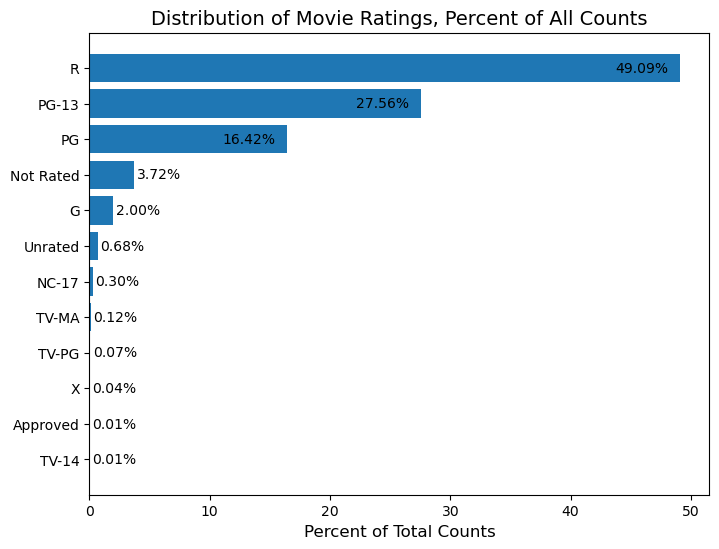

In [33]:
# Which ratings are most common in the dataset?

rating_counts_percent = (df['rating'].value_counts() / len(df['rating'])) * 100
rating_counts_percent = rating_counts_percent.sort_values(ascending=False)

plt.figure(figsize=(8,6))
bars = plt.barh(rating_counts_percent.index, rating_counts_percent.values)

plt.gca().invert_yaxis()

# add the percent counts values to the bars (ratings categories)
for bar in bars:
    width = bar.get_width()
    if width > 5: # only add text if the bar is long enough
        plt.text(width - 1, bar.get_y() + bar.get_height() / 2, # positions the tex within the bar
                 f'{width:.2f}%', # format the text as a percent
                 va = 'center', ha = 'right', color = 'black')
    else: 
        plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2,
                 f'{width:.2f}%',
                 va = 'center', ha = 'left', color = 'black')
             

plt.xlabel('Percent of Total Counts', fontsize = 12)
plt.title('Distribution of Movie Ratings, Percent of All Counts', fontsize = 14)

plt.show()

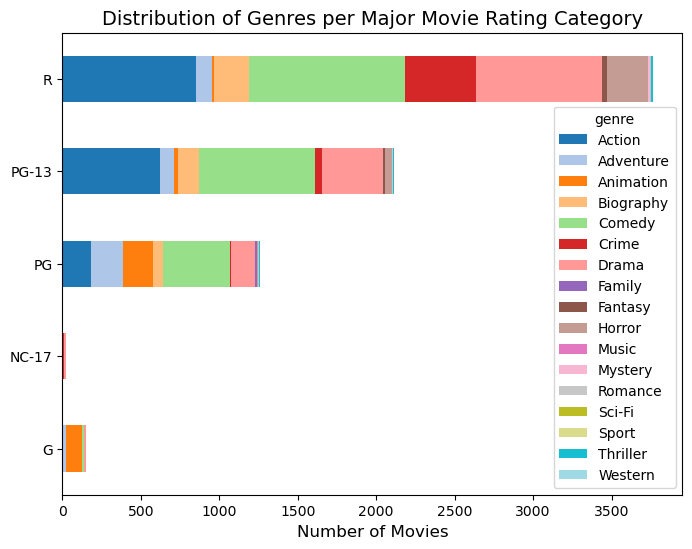

In [34]:
# Inspect the distribution of genres in the main movie ratings of R, PG-13, PG, G, and NC-17

# filter the data based on these ratings
ratings_of_interest = ['R','PG-13','PG','G','NC-17']

filtered_rating = df[df['rating'].isin(ratings_of_interest)]

# count genres per rating
genre_counts_per_rating = filtered_rating.groupby(['rating','genre']).size().unstack(fill_value=0)

# reset index name to remove 'rating' label on the y axis
genre_counts_per_rating.index.name = None

# stacked bar plot
genre_counts_per_rating.plot(kind='barh', stacked=True, figsize=(8,6), colormap='tab20')
plt.xlabel('Number of Movies', fontsize=12)
plt.title('Distribution of Genres per Major Movie Rating Category', fontsize = 14)

plt.show()

Oberservations of the genres in each main rating category:

- R and PG-13 are similar with the main exception of the crime genre, which is much more represented in the R category.
- R has a very small proportion of animation movies but more fantasy and horror compared to all other categories. 
- PG has substantially more adventure and animation movies as a proportion of the total.
- G is mostly animation.  

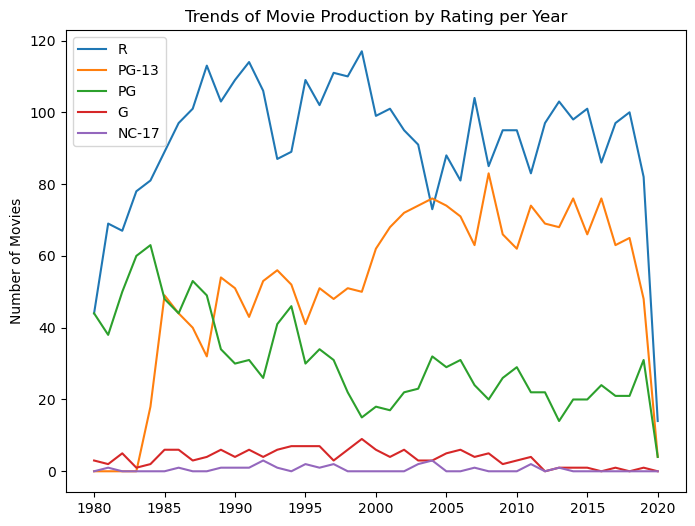

In [35]:
# inspect the trend of movie ratings 

# group by year and rating, count the occurrences
rating_counts_per_year = filtered_rating.groupby(['year','rating']).size().unstack(fill_value=0)

# plot
plt.figure(figsize=(8,6))

for rating in ratings_of_interest: 
    plt.plot(rating_counts_per_year.index, rating_counts_per_year[rating], label=rating)

plt.ylabel('Number of Movies')
plt.title('Trends of Movie Production by Rating per Year')
plt.legend()


plt.show()

Notes about the movie production trend based on rating

- PG-13 was instituted in 1984, so the sharp upward trend towards the left of the plot makes sense.  The dowward trend in movies with a PG rating during this time is likely due to the division of ratings, that would have been PG, into two categories, PG and PG-13.

- PG vs PG-13:  There is a notable upward trend in production of movies wiht a PG-13 rating and a downward trend in movies with a PG rating.

- While this dataset only reaches to the year 2020, there is an apparent collapse of movies with all three of the three major ratings (R, PG-13, and PG) just prior to 2020.  I assume that this is due to the SARS-CoV-2 pandemic.

- R vs PG-13/PG:  There is a clear reciprocoal relationship between movies with R rating and those with PG-13 or PG ratings. When there is an increase in the production of movies with R rating there is a matching decrease in the production of movies with PG-13 and PG ratings.  While this relationship could simply be coincidental, the plots provide a basis for what could be an interesting investigation of the social, economic, technological context around those apparently reciprocal trends.  

### score vs rating

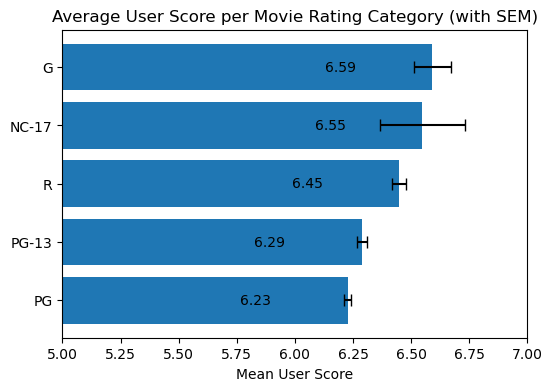

In [485]:
# Which ratings get the highest scores?  

# filter the data based on these ratings
ratings_to_plot = ['R','PG-13','PG','G','NC-17']
filtered_ratings = df[df['rating'].isin(ratings_to_plot)]

# plot mean score values per rating with SEM
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_ratings, 'rating', 'score', 
                 title='Average User Score per Movie Rating Category (with SEM)',
                 xlabel='Mean User Score',
                 xlim=(5,7),
                  ax = ax)

plt.show()

In [463]:
# number of records per rating

print(df.groupby('rating')['score'].count())

rating
Approved        1
G             153
NC-17          23
Not Rated     285
PG           1259
PG-13        2113
R            3764
TV-14           1
TV-MA           9
TV-PG           5
Unrated        52
X               3
Name: score, dtype: int64


The higher SEM values for G and especially NC-17 are not surprising due to the low number of films with these ratings in this dataset.  The higher SEM values means that there is less confidence that the mean scores accurately reflect the population mean. And, the substantial differences in dataset sizes means that the SEM values are not reliably comparable between the ratings groups.  

I will further investigate heteroscedasticity, since this may exacerbate the problem of unequal size datasets

In [464]:
# perform Levene's test for equal variance

levenes_test(filtered_ratings,'rating','score')

Levene's test p-value: 0.0000


The p-values is < 0.05, so the null hypothesis is rejected meaning that at least one group is heterscedastic relative to another.

In [465]:
# check effect size

var_score_rating = filtered_ratings.groupby('rating')['score'].var()
print(var_score_rating)

rating
G        0.953653
NC-17    0.777154
PG       1.138753
PG-13    0.912926
R        0.844464
Name: score, dtype: float64


The variance values are actually minor, so there isn't a large spread in the score variable within each rating category.  However, the Levene's test shows a statistically significantly difference in variance. Heterscedasticity is present but may not have a substantial effect for analysis. I will still run non-parametric ANOVAs, etc, where necessary.

In [466]:
# perform a Welch's ANOVA to test for stastical difference

welchs_anova(filtered_ratings,'rating','score')

   Source  ddof1       ddof2          F         p-unc       np2
0  rating      4  152.883298  18.291602  2.676069e-12  0.010507


Conclusions from the Welch's ANOVA test:

The F-statistic value of 18.29 suggests that the group means are likely signifcantly different from each other.

The very small p-value of 2.68e-12 allows the null hypothesis to be rejected and conclude that at least on of the groups are statistically different.
However, the partial eta squared (np2) value is small, indicating that rating explains only a small portion of the variance observed in the mean score values.

In [479]:
# perform a Games-Howell post-hoc test to determine which groups are statistically different

posthoc_results = posthoc_test(filtered_ratings,'rating','score')
print(posthoc_results)

Unique values in independent variable:
 ['R' 'PG' 'G' 'NC-17' 'PG-13']

       A      B   mean(A)   mean(B)      diff        se         T  \
0      G  NC-17  6.590196  6.547826  0.042370  0.200056  0.211791   
1      G     PG  6.590196  6.227879  0.362317  0.084484  4.288593   
2      G  PG-13  6.590196  6.286938  0.303258  0.081640  3.714580   
3      G      R  6.590196  6.448273  0.141923  0.080358  1.766137   
4  NC-17     PG  6.547826  6.227879  0.319947  0.186263  1.717718   
5  NC-17  PG-13  6.547826  6.286938  0.260888  0.184990  1.410281   
6  NC-17      R  6.547826  6.448273  0.099553  0.184428  0.539793   
7     PG  PG-13  6.227879  6.286938 -0.059059  0.036559 -1.615447   
8     PG      R  6.227879  6.448273 -0.220394  0.033598 -6.559680   
9  PG-13      R  6.286938  6.448273 -0.161335  0.025620 -6.297135   

            df          pval    hedges  
0    30.713918  9.995258e-01  0.043715  
1   198.809122  2.692197e-04  0.342359  
2   173.742480  2.514232e-03  0.316812  
3   

In [480]:
# output only rating pairs that are statistically distinct for user score

significant_pairs_score_rating = posthoc_results[posthoc_results['pval'] < 0.05]
print('Rating Pairs That are Statistically Distinct for User Score\n')
print(significant_pairs_score_rating)

Rating Pairs That are Statistically Distinct for User Score

       A      B   mean(A)   mean(B)      diff        se         T  \
1      G     PG  6.590196  6.227879  0.362317  0.084484  4.288593   
2      G  PG-13  6.590196  6.286938  0.303258  0.081640  3.714580   
8     PG      R  6.227879  6.448273 -0.220394  0.033598 -6.559680   
9  PG-13      R  6.286938  6.448273 -0.161335  0.025620 -6.297135   

            df          pval    hedges  
1   198.809122  2.692197e-04  0.342359  
2   173.742480  2.514232e-03  0.316812  
8  1919.985325  6.906831e-10 -0.229968  
9  4234.110961  3.336104e-09 -0.173039  


Conclusions from the Games-Howell post-hoc test:

The following groups are statistically different based on the p-value
- G vs PG
- G vs PG-13
- PG vs R
- PG-13 vs R

The hedges column provides the magnitude of the difference between groups.
- G vs PG ~ medium effect
- G vs PG-13 ~ medium effect
- PG vs R ~ small effect
- PG-13 vs R ~ small effect

The difference in scores for R vs G and between NC-17 and R, PG-13, and PG are not statistically different.

Extending these test values back to the bar plot, movies with G or R rating have the highest mean user score, followed by PG-13 then PG. 

### budget vs rating

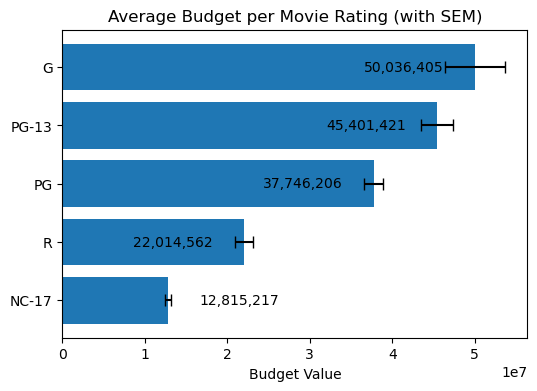

In [486]:
# Which ratings get the highest budgets? 

fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_ratings, 
                   'rating', 
                   'budget', 
                   xlabel = 'Budget Value',
                   title = 'Average Budget per Movie Rating (with SEM)',
                   decimal_places = 0,
                   text_offset = 0.075,
                   error_type = 'sem',
                   ax = ax)

plt.show()

In [487]:
# Levene's test for equal variance between groups

levenes_test(filtered_ratings, 'rating', 'budget')

Levene's test p-value: 0.0000


In [488]:
# check effect size

budget_rating_var = filtered_ratings.groupby('rating')['budget'].var()

print(budget_rating_var)

rating
G        2.058496e+15
NC-17    8.610442e+13
PG       1.652801e+15
PG-13    2.399976e+15
R        4.312907e+14
Name: budget, dtype: float64


The Levene's test indicates heterscedasticity.

The effect of the variance is quite large indicating that the budget values differ substantially, widely spread out from the mean, within rating groups.  It could also be due to a few outliers.  I will examine this with a boxplot of the groups.    

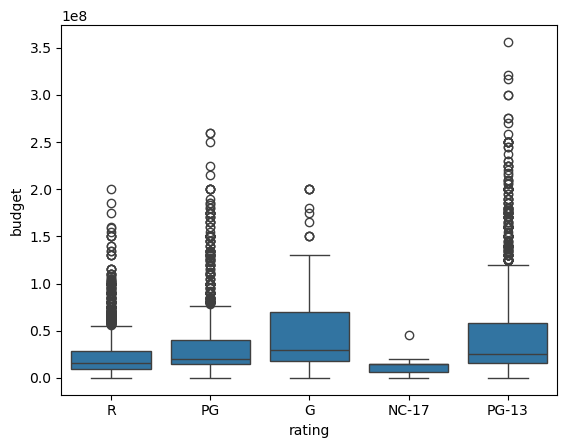

In [489]:
sns.boxplot(x='rating', y='budget', data=filtered_ratings)
plt.show()

There are, in fact, quite a few outliers, as seen in the EDA section for both budget and rating as categories.  This makes practical sense in that independent productions tend to have far smaller budgets than those from large production companies meant to be blockbuster movies.  

In [490]:
# Welch's ANOVA to determine if there is significant variation between any of the groups

welchs_anova(filtered_ratings, 'rating', 'budget')

   Source  ddof1       ddof2           F         p-unc       np2
0  rating      4  157.488278  161.507291  1.194943e-54  0.085973


Welch's ANOVA indicates that the variance between at least one group is statistically significant.

The partial eta squared value is medium (np2 = 0.086), indicating that rating explains about 8.6% of the variance observed in the mean budget values.

In [493]:
# Games-Howell test to determine which groups are statistically distinct.  

posthoc_results_budget_rating = posthoc_test(filtered_ratings, 'rating', 'budget')
print(posthoc_results_budget_rating)

Unique values in independent variable:
 ['R' 'PG' 'G' 'NC-17' 'PG-13']

       A      B       mean(A)       mean(B)          diff            se  \
0      G  NC-17  5.003641e+07  1.281522e+07  3.722119e+07  4.147034e+06   
1      G     PG  5.003641e+07  3.774621e+07  1.229020e+07  3.842787e+06   
2      G  PG-13  5.003641e+07  4.540142e+07  4.634984e+06  3.819691e+06   
3      G      R  5.003641e+07  2.201456e+07  2.802184e+07  3.683586e+06   
4  NC-17     PG  1.281522e+07  3.774621e+07 -2.493099e+07  2.248657e+06   
5  NC-17  PG-13  1.281522e+07  4.540142e+07 -3.258620e+07  2.208956e+06   
6  NC-17      R  1.281522e+07  2.201456e+07 -9.199345e+06  1.964244e+06   
7     PG  PG-13  3.774621e+07  4.540142e+07 -7.655215e+06  1.564801e+06   
8     PG      R  3.774621e+07  2.201456e+07  1.573164e+07  1.194727e+06   
9  PG-13      R  4.540142e+07  2.201456e+07  2.338686e+07  1.118212e+06   

           T           df          pval    hedges  
0   8.975375   161.803390  9.470202e-14  0.871322 

In [494]:
# output only rating pairs that are statistically distinct for average budget

significant_pairs_budget_rating = posthoc_results_budget_rating[posthoc_results_budget_rating['pval'] < 0.05]
print('Rating Pairs That are Statistically Distinct for Mean Budget\n')
print(significant_pairs_budget_rating)

Rating Pairs That are Statistically Distinct for Mean Budget

       A      B       mean(A)       mean(B)          diff            se  \
0      G  NC-17  5.003641e+07  1.281522e+07  3.722119e+07  4.147034e+06   
1      G     PG  5.003641e+07  3.774621e+07  1.229020e+07  3.842787e+06   
3      G      R  5.003641e+07  2.201456e+07  2.802184e+07  3.683586e+06   
4  NC-17     PG  1.281522e+07  3.774621e+07 -2.493099e+07  2.248657e+06   
5  NC-17  PG-13  1.281522e+07  4.540142e+07 -3.258620e+07  2.208956e+06   
6  NC-17      R  1.281522e+07  2.201456e+07 -9.199345e+06  1.964244e+06   
7     PG  PG-13  3.774621e+07  4.540142e+07 -7.655215e+06  1.564801e+06   
8     PG      R  3.774621e+07  2.201456e+07  1.573164e+07  1.194727e+06   
9  PG-13      R  4.540142e+07  2.201456e+07  2.338686e+07  1.118212e+06   

           T           df          pval    hedges  
0   8.975375   161.803390  9.470202e-14  0.871322  
1   3.198251   182.899400  1.393322e-02  0.298227  
3   7.607218   154.599592  2.56

Conclusions about budget vs rating:

All groups have statistically different mean values, except G vs PG-13 according to the Games-Howell post hoc test.

The difference is small to medium for all statistically distinct groups.  The following groups have very small differences (effect size, hedges):
- NC-17 vs PG
- NC-17 vs PG-13
- NC-17 vs R
- PG vs PG-13

So, G or PG-13 rated movies have the highest mean budget and NC-17 rated movies have the lowest mean budget.  

-- It's important to note that ~28% of the budget data was imputed due to missing data.  See the "Clean the data" section.  

### gross revenue vs rating

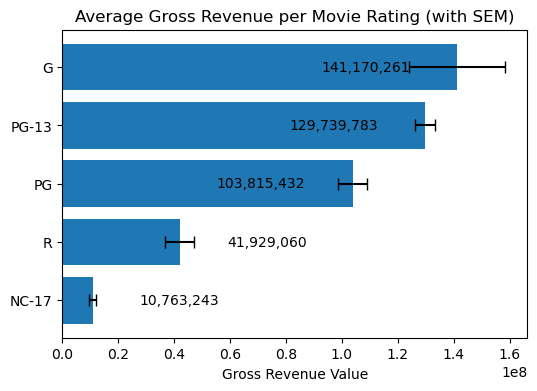

In [498]:
# Which ratings yield the greatest gross revenue?  

fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_ratings, 'rating', 'gross',
                 xlabel = 'Gross Revenue Value',
                 title = 'Average Gross Revenue per Movie Rating (with SEM)',
                decimal_places = 0,
                  text_offset = 0.12,
                  ax = ax)

plt.show()

The SEM of the mean gross revenue for the G rated movies suggests that individual G-rated movies have widely varying gross revenues, and there is uncertainty in the value. 

In [95]:
# Levene's test for equal variance between groups

levenes_test(filtered_ratings, 'rating', 'gross')

Levene's test p-value: 0.0000


In [96]:
# variance effect size

gross_rating_var = filtered_ratings.groupby('rating')['gross'].var()

print(gross_rating_var)

rating
G        4.584850e+16
NC-17    2.676141e+14
PG       3.576644e+16
PG-13    5.490101e+16
R        6.141347e+15
Name: gross, dtype: float64


The Levene's test indicates heterscedasticity.

The effect of the variance is quite large indicating that the gross revenue values are widely disperesed around the mean within each rating group. 

In [98]:
# Welch's ANOVA to test for statistical difference between groups

welchs_anova(filtered_ratings, 'rating', 'gross')

   Source  ddof1       ddof2           F         p-unc       np2
0  rating      4  183.367033  132.217935  6.454363e-53  0.059475


Welch's ANOVA indicates that the variance between at least one group is statistically significant.

The partial eta squared value is medium (np2 = 0.059), indicating that the top 5 ratings group explains ~5.9% of the variance observed in the mean gross values.

In [499]:
# Games-Howell post-hoc test to determine which groups are statistically different

posthoc_results_gross_rating = posthoc_test(filtered_ratings, 'rating', 'gross')
print(posthoc_results_gross_rating)

Unique values in independent variable:
 ['R' 'PG' 'G' 'NC-17' 'PG-13']

       A      B       mean(A)       mean(B)          diff            se  \
0      G  NC-17  1.411703e+08  1.076324e+07  1.304070e+08  1.764366e+07   
1      G     PG  1.411703e+08  1.038154e+08  3.735483e+07  1.811276e+07   
2      G  PG-13  1.411703e+08  1.297398e+08  1.143048e+07  1.804566e+07   
3      G      R  1.411703e+08  4.192906e+07  9.924120e+07  1.735785e+07   
4  NC-17     PG  1.076324e+07  1.038154e+08 -9.305219e+07  6.328033e+06   
5  NC-17  PG-13  1.076324e+07  1.297398e+08 -1.189765e+08  6.133342e+06   
6  NC-17      R  1.076324e+07  4.192906e+07 -3.116582e+07  3.642389e+06   
7     PG  PG-13  1.038154e+08  1.297398e+08 -2.592435e+07  7.375032e+06   
8     PG      R  1.038154e+08  4.192906e+07  6.188637e+07  5.480895e+06   
9  PG-13      R  1.297398e+08  4.192906e+07  8.781072e+07  5.254912e+06   

           T           df          pval    hedges  
0   7.391154   162.341926  7.284762e-11  0.648529 

In [500]:
# output only rating pairs that are statistically distinct for average gross revenue

significant_pairs_gross_rating = posthoc_results_gross_rating[posthoc_results_gross_rating['pval'] < 0.05]
print('Rating Pairs That are Statistically Distinct for Mean Gross Revenue\n')
print(significant_pairs_gross_rating)

Rating Pairs That are Statistically Distinct for Mean Gross Revenue

       A      B       mean(A)       mean(B)          diff            se  \
0      G  NC-17  1.411703e+08  1.076324e+07  1.304070e+08  1.764366e+07   
3      G      R  1.411703e+08  4.192906e+07  9.924120e+07  1.735785e+07   
4  NC-17     PG  1.076324e+07  1.038154e+08 -9.305219e+07  6.328033e+06   
5  NC-17  PG-13  1.076324e+07  1.297398e+08 -1.189765e+08  6.133342e+06   
6  NC-17      R  1.076324e+07  4.192906e+07 -3.116582e+07  3.642389e+06   
7     PG  PG-13  1.038154e+08  1.297398e+08 -2.592435e+07  7.375032e+06   
8     PG      R  1.038154e+08  4.192906e+07  6.188637e+07  5.480895e+06   
9  PG-13      R  1.297398e+08  4.192906e+07  8.781072e+07  5.254912e+06   

           T           df          pval    hedges  
0   7.391154   162.341926  7.284762e-11  0.648529  
3   5.717367   153.659535  5.431828e-07  1.131994  
4 -14.704757   235.975924  0.000000e+00 -0.495987  
5 -19.398321   218.603459  0.000000e+00 -0.5102

The Games-Howell post-hoc test indicates that all groups are statistically distinct, except:
- G vs PG
- G vs PG-13

So, G or PG or PG-13 has the highest mean gross revenue, followed by R and then NC-17

### profit vs rating

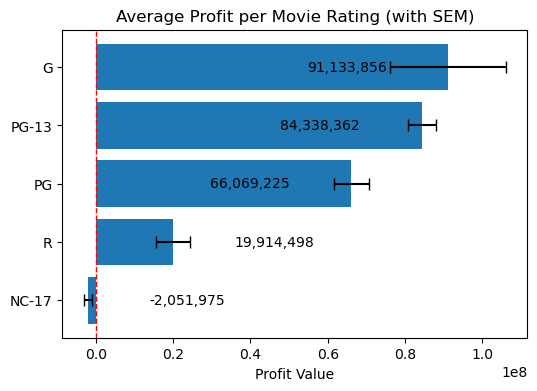

In [501]:
# which groups of rated movies show the greatest profit?

filtered_ratings_copy = filtered_ratings.copy()
filtered_ratings_copy['profit'] = filtered_ratings_copy['gross'] - filtered_ratings_copy['budget']

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_ratings_copy, 'rating', 'profit',
                 xlabel = 'Profit Value',
                 title = 'Average Profit per Movie Rating (with SEM)',
                 decimal_places = 0,
                text_offset = 0.175,
                vline_x = 0,
                  ax = ax)

plt.show()

NC-17 movies are generally not profitable!  

However, the profit value for NC-17, and possible G as well, is unreliable due to the low number of records for movies with these ratings.  

In [115]:
df['rating'].value_counts()

rating
R            3764
PG-13        2113
PG           1259
Not Rated     285
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

In [117]:
# perform Levene's test for equal variance

levenes_test(filtered_ratings_copy, 'rating', 'profit')

Levene's test p-value: 0.0000


In [118]:
# check effect size

var_profit_rating = filtered_ratings_copy.groupby('rating')['profit'].var()
print(var_profit_rating)

rating
G        3.478108e+16
NC-17    3.089584e+14
PG       2.611366e+16
PG-13    3.973662e+16
R        4.805575e+15
Name: profit, dtype: float64


The Levene's test indicates heterscedasticity.

The effect of the variance is quite large indicating that the profit values differ substantially, widely spread out from the mean, within rating groups. 

In [120]:
# Welch's ANOVA to test for statistical difference between groups

welchs_anova(filtered_ratings_copy, 'rating', 'profit')

   Source  ddof1       ddof2          F         p-unc       np2
0  rating      4  172.524792  89.509229  4.856621e-41  0.044404


The Welch's ANOVA indicates that the mean profits for one group is statistically different from at least one other rating group.  

The partial eta squared value (np2) indicates a medium degree of variance.  The main 5 ratings as a group accounts for ~4.4% of variance in profit..  

In [502]:
# Games-Howell post-hoc test to determine which groups are statistically different

posthoc_results_profit_rating = posthoc_test(filtered_ratings_copy, 'rating', 'profit')
print(posthoc_results_profit_rating)

Unique values in independent variable:
 ['R' 'PG' 'G' 'NC-17' 'PG-13']

       A      B       mean(A)       mean(B)          diff            se  \
0      G  NC-17  9.113386e+07 -2.051975e+06  9.318583e+07  1.551645e+07   
1      G     PG  9.113386e+07  6.606923e+07  2.506463e+07  1.575020e+07   
2      G  PG-13  9.113386e+07  8.433836e+07  6.795494e+06  1.568863e+07   
3      G      R  9.113386e+07  1.991450e+07  7.121936e+07  1.511966e+07   
4  NC-17     PG -2.051975e+06  6.606923e+07 -6.812120e+07  5.845901e+06   
5  NC-17  PG-13 -2.051975e+06  8.433836e+07 -8.639034e+07  5.677919e+06   
6  NC-17      R -2.051975e+06  1.991450e+07 -2.196647e+07  3.835322e+06   
7     PG  PG-13  6.606923e+07  8.433836e+07 -1.826914e+07  6.288670e+06   
8     PG      R  6.606923e+07  1.991450e+07  4.615473e+07  4.692367e+06   
9  PG-13      R  8.433836e+07  1.991450e+07  6.442386e+07  4.481351e+06   

           T           df          pval    hedges  
0   6.005614   166.478138  1.156389e-07  0.531953 

In [503]:
significant_pairs_profit_rating = posthoc_results_profit_rating[posthoc_results_profit_rating['pval'] < 0.05]
print('Rating Pairs That are Statistically Different by Profit\n')
print(significant_pairs_profit_rating)

Rating Pairs That are Statistically Different by Profit

       A      B       mean(A)       mean(B)          diff            se  \
0      G  NC-17  9.113386e+07 -2.051975e+06  9.318583e+07  1.551645e+07   
3      G      R  9.113386e+07  1.991450e+07  7.121936e+07  1.511966e+07   
4  NC-17     PG -2.051975e+06  6.606923e+07 -6.812120e+07  5.845901e+06   
5  NC-17  PG-13 -2.051975e+06  8.433836e+07 -8.639034e+07  5.677919e+06   
6  NC-17      R -2.051975e+06  1.991450e+07 -2.196647e+07  3.835322e+06   
7     PG  PG-13  6.606923e+07  8.433836e+07 -1.826914e+07  6.288670e+06   
8     PG      R  6.606923e+07  1.991450e+07  4.615473e+07  4.692367e+06   
9  PG-13      R  8.433836e+07  1.991450e+07  6.442386e+07  4.481351e+06   

           T           df          pval    hedges  
0   6.005614   166.478138  1.156389e-07  0.531953  
3   4.710381   153.711929  5.346071e-05  0.921617  
4 -11.652814   136.692193  0.000000e+00 -0.424926  
5 -15.215142   124.181726  0.000000e+00 -0.435461  
6  -5.7

All of the rating groups are statistically different, by profit, except:
- G vs PG
- G vs PG-13

Therefore either G, PG-13, or PG rated movies have the greatest mean profit, followed by R and then NC-17.  

## genre - analysis

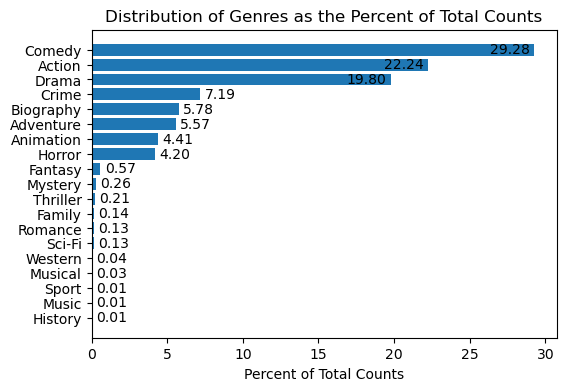

In [510]:
# what is the distribution of genres in the dataset?

genre_dist = (df['genre'].value_counts() / len(df)) * 100
genre_dist_sort = genre_dist.sort_values(ascending=False)

# convert genre distribution to a Dataframe to plot with barplot_with_error function
genre_df = genre_dist_sort.reset_index()
genre_df.columns = ['genre','percentage']

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(genre_df, 
                   'genre', 
                   'percentage', 
                   xlabel = 'Percent of Total Counts',
                   title = 'Distribution of Genres as the Percent of Total Counts',
                   error_type = None,
                   text_offset = 0.01,
                   ax = ax)
plt.show()

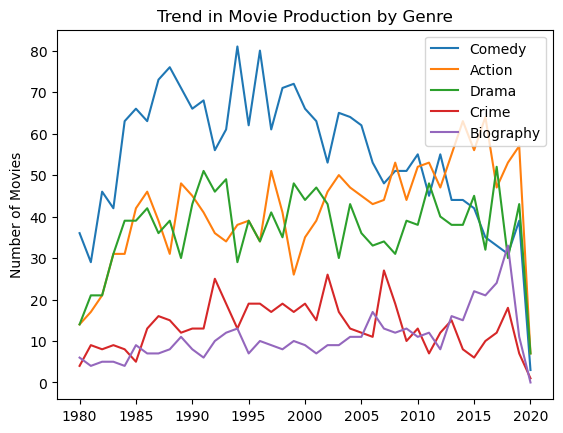

In [64]:
# what is the trend for the top 5 movie genres?

genres_top5 = ['Comedy','Action','Drama','Crime','Biography']
filtered_genres = df[df['genre'].isin(genres_top5)]

# group by year, genre and count the occurences
genres_trends = filtered_genres.groupby(['year','genre']).size().unstack(fill_value=0)

# plot
for genre in genres_top5:
    plt.plot(genres_trends.index, genres_trends[genre], label=genre)

plt.ylabel('Number of Movies')
plt.title('Trend in Movie Production by Genre')
plt.legend()
plt.show()
                                        

Observations about the Trend in movie production:

- Comedies dominated in terms of production but started declining in the late 1990s.
- Action movie production seems to have been increasing in that same time period.
- Drama movie production increased between 1980 - 1985 and then remained steady on average.
- Biographies had a surge around 2012.
- The affects of the COVID-19 pandemic are apparent in the plunge in production of all plotted movie genres around 2019.
- There is a reciprocal relationship between comedies and dramas starting around 1990.
- There also appears to be a somewhat predictive relationship between the action genre and comedy.  When the production of one of the genres increases the other does as well but in a lagging timeframe.

### score vs genre

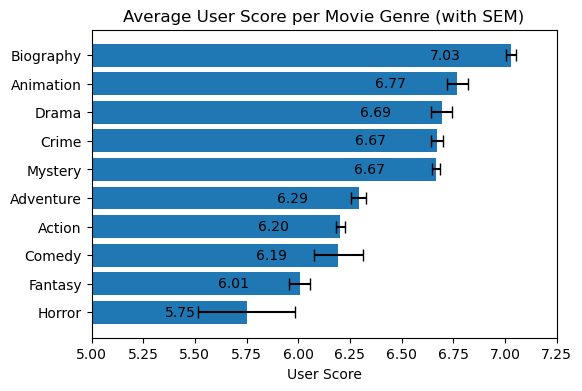

In [444]:
# what is the average score for the top 10 genres?

genres_top10 = ['Comedy','Action','Drama','Crime','Biography','Adventure','Animation','Horror','Fantasy','Mystery']
filtered_genres10 = df[df['genre'].isin(genres_top10)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_genres10, 
                   'genre', 
                   'score',
                   xlabel = 'User Score',
                   title = 'Average User Score per Movie Genre (with SEM)',
                   xlim = (5,7.25),
                   text_offset = 0.035,
                  ax = ax)

plt.show()

Very small SEM values for all groups mean that the group/sample mean accurately estimates the population mean and has low variability.  

In [438]:
# perform Levene's test for equal variance

# p-value < 0.05 means that the null hypothesis (homoscedasticity between all groups) 
# is rejected.

levenes_test(filtered_genres10, 'genre', 'score')

Levene's test p-value: 0.0000


In [439]:
# check effect size

var_score_genre = filtered_genres10.groupby('genre')['score'].var()
print(var_score_genre)

genre
Action       0.971694
Adventure    1.091619
Animation    0.834125
Biography    0.416621
Comedy       0.886082
Crime        0.729641
Drama        0.761687
Fantasy      0.635999
Horror       0.821884
Mystery      1.097132
Name: score, dtype: float64


The variance values are actually minor, so there isn't a large spread in the score variable within each genre category. However, Levene's test shows a statistically significantly difference in variance. Heterscedasticity is present but may not have a substantial effect for analysis.

In [440]:
# Welch's ANOVA for statistical difference between groups

welchs_anova(filtered_genres10, 'genre', 'score')

  Source  ddof1       ddof2          F          p-unc       np2
0  genre      9  377.477072  114.43462  3.781381e-102  0.098496


The high F-statistic and low p-value means that there is a statistical difference between the mean score between genre groups.

The partial eta squared value (np2) indicates a medium effect.  The top 10 genres group accounts for ~9.8% of the variance in mean user scores.  

In [591]:
# Games-Howell post-hoc test to determine which groups are statistically different

posthoc_results_score_genre = posthoc_test(filtered_genres10, 'genre', 'score')
print(posthoc_results_score_genre)

Unique values in independent variable:
 ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Animation' 'Mystery']

            A          B   mean(A)   mean(B)      diff        se          T  \
0      Action  Adventure  6.202815  6.291569 -0.088754  0.055914  -1.587323   
1      Action  Animation  6.202815  6.769231 -0.566416  0.055116 -10.276858   
2      Action  Biography  6.202815  7.030926 -0.828110  0.038863 -21.308247   
3      Action     Comedy  6.202815  6.193987  0.008829  0.031058   0.284262   
4      Action      Crime  6.202815  6.671506 -0.468691  0.043522 -10.769185   
5      Action      Drama  6.202815  6.693676 -0.490861  0.032737 -14.994291   
6      Action    Fantasy  6.202815  6.006818  0.195997  0.122574   1.599008   
7      Action     Horror  6.202815  5.750621  0.452194  0.055878   8.092534   
8      Action    Mystery  6.202815  6.665000 -0.462185  0.235428  -1.963166   
9   Adventure  Animation  6.291569  6.769231 -0.477662  0.070882  -

In [592]:
# Print the list of pairs that are statistically distinct (p-value < 0.05)
sig_pairs_score_genre = posthoc_results_score_genre[posthoc_results_score_genre['pval'] < 0.05]

print('Pairings of Genres With Statistically Different Average User Scores\n')
print(sig_pairs_score_genre)

Pairings of Genres With Statistically Different Average User Scores

            A          B   mean(A)   mean(B)      diff        se          T  \
1      Action  Animation  6.202815  6.769231 -0.566416  0.055116 -10.276858   
2      Action  Biography  6.202815  7.030926 -0.828110  0.038863 -21.308247   
4      Action      Crime  6.202815  6.671506 -0.468691  0.043522 -10.769185   
5      Action      Drama  6.202815  6.693676 -0.490861  0.032737 -14.994291   
7      Action     Horror  6.202815  5.750621  0.452194  0.055878   8.092534   
9   Adventure  Animation  6.291569  6.769231 -0.477662  0.070882  -6.738795   
10  Adventure  Biography  6.291569  7.030926 -0.739356  0.059135 -12.502876   
12  Adventure      Crime  6.291569  6.671506 -0.379937  0.062295  -6.098977   
13  Adventure      Drama  6.291569  6.693676 -0.402107  0.055301  -7.271175   
15  Adventure     Horror  6.291569  5.750621  0.540948  0.071477   7.568171   
17  Animation  Biography  6.769231  7.030926 -0.261695  0.0583

In [593]:
# Print the list of pairs that are NOT statistically distinct (p-value > 0.05)
insig_pairs_score_genre = posthoc_results_score_genre[posthoc_results_score_genre['pval'] > 0.05]

print('Pairings of Genres That are Not Statistically Different by Average User Scores\n')
print(insig_pairs_score_genre)

Pairings of Genres That are Not Statistically Different by Average User Scores

            A          B   mean(A)   mean(B)      diff        se         T  \
0      Action  Adventure  6.202815  6.291569 -0.088754  0.055914 -1.587323   
3      Action     Comedy  6.202815  6.193987  0.008829  0.031058  0.284262   
6      Action    Fantasy  6.202815  6.006818  0.195997  0.122574  1.599008   
8      Action    Mystery  6.202815  6.665000 -0.462185  0.235428 -1.963166   
11  Adventure     Comedy  6.291569  6.193987  0.097582  0.054325  1.796281   
14  Adventure    Fantasy  6.291569  6.006818  0.284751  0.130426  2.183233   
16  Adventure    Mystery  6.291569  6.665000 -0.373431  0.239610 -1.558493   
19  Animation      Crime  6.769231  6.671506  0.097724  0.061580  1.586963   
20  Animation      Drama  6.769231  6.693676  0.075555  0.054494  1.386481   
23  Animation    Mystery  6.769231  6.665000  0.104231  0.239425  0.435338   
29  Biography    Mystery  7.030926  6.665000  0.365926  0.2362

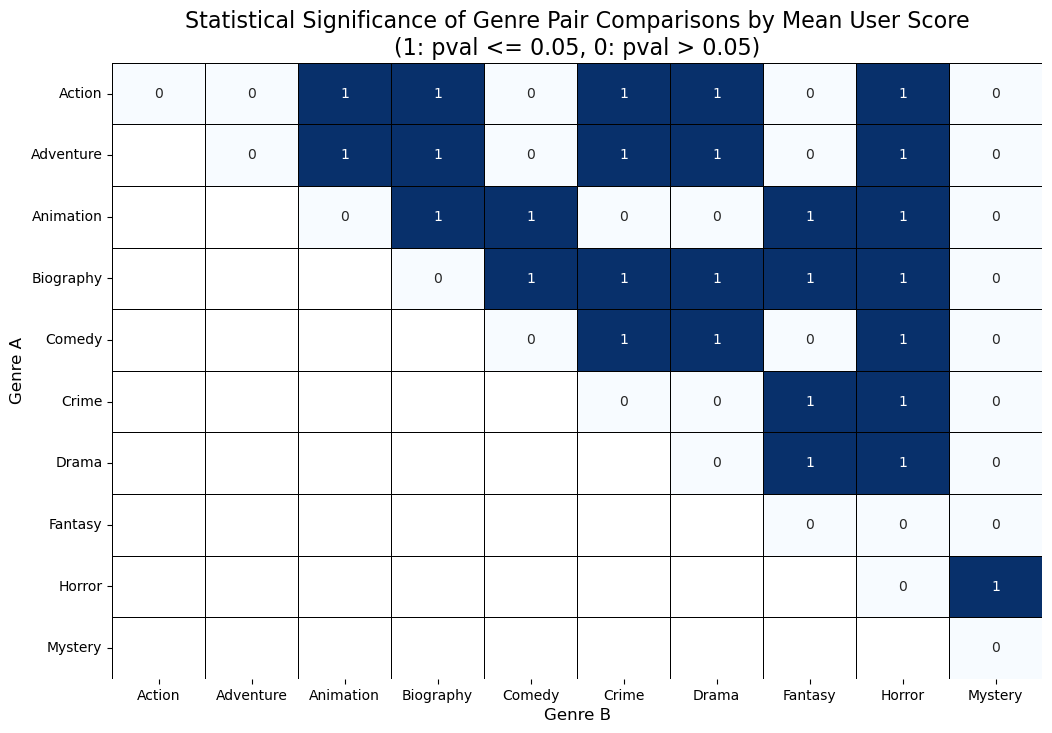

In [612]:
# Create a new matrix with boolean values based on the p-value threshold
# Mark True for p-values <= 0.05, else False

# ensure both axes have the saem set of genres
all_genres = sorted(set(posthoc_results_score_genre['A']).union(set(posthoc_results_score_genre['B'])))

# pivot table 
sig_matrix_score_genre = (
    posthoc_results_score_genre
    .pivot(index='A', columns='B', values='pval')
    .reindex(index=all_genres, columns=all_genres, fill_value=1) # fill missing values with 1 (no significance)
    .map(lambda x: 1 if x <= 0.05 else 0)
)

# set diagonal values to 0 (same gemre comparisons are not statistically different)
np.fill_diagonal(sig_matrix_score_genre.values, 0)

# mask the lower triangle 
mask = np.tril(np.ones_like(sig_matrix_score_genre, dtype=bool), k=-1)

# Create a heatmap with a custom color palette for two colors: green for significant and gray for non-significant
plt.figure(figsize=(12, 8))
sns.heatmap(sig_matrix_score_genre, cmap="Blues", cbar=False, linewidths=0.5, 
            linecolor='black', annot=True, fmt='d', mask=mask)

# Add labels and title
plt.title('Statistical Significance of Genre Pair Comparisons by Mean User Score\n(1: pval <= 0.05, 0: pval > 0.05)', fontsize=16)
plt.xlabel('Genre B', fontsize=12)
plt.ylabel('Genre A', fontsize=12)

plt.show()

### budget vs genre

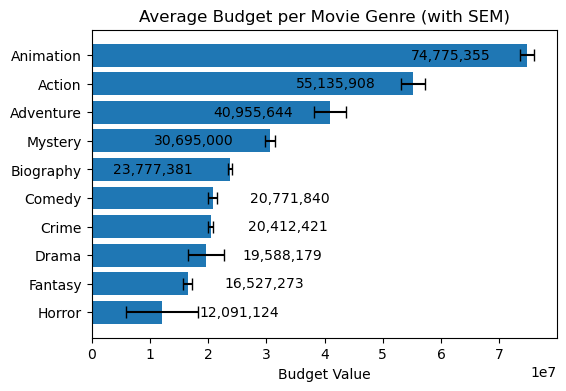

In [520]:
# which genres have the largest and smallest budgets?

fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_genres10, 
                   'genre', 
                   'budget',
                   xlabel = 'Budget Value',
                   title = 'Average Budget per Movie Genre (with SEM)',
                   decimal_places = 0,
                  error_type = 'sem',
                   text_offset = 0.085,
                  ax = ax)

plt.show()

Low SEM values for most genres provide good confidence that the mean budgets for these five genres represent their respective population mean.  

In [521]:
# perform Levene's test for equal variance

levenes_test(filtered_genres10, 'genre', 'budget')

Levene's test p-value: 0.0000


In [522]:
# check effect size

var_budget_genre = filtered_genres10.groupby('genre')['budget'].var()
print(var_budget_genre)

genre
Action       2.641095e+15
Adventure    1.899657e+15
Animation    2.486724e+15
Biography    3.220297e+14
Comedy       2.937697e+14
Crime        3.028291e+14
Drama        3.320233e+14
Fantasy      4.284234e+14
Horror       1.852121e+14
Mystery      7.777342e+14
Name: budget, dtype: float64


The Levene's test indicates heterscedasticity.

The effect of the variance is quite large indicating that the budget values differ substantially, widely spread out from the mean, within genre groups. 

In [523]:
# Welch's ANOVA for statistical difference between groups

welchs_anova(filtered_genres10, 'genre', 'budget')

  Source  ddof1       ddof2          F          p-unc       np2
0  genre      9  376.196253  152.20066  1.426271e-119  0.231469


The high F-statistic and low p-value means that there is a statistical difference in the mean budget between genre groups.

The partial eta squared value (np2) indicates a large effect. The top 5 genres group accounts for ~23% of the variance in mean budget.

In [524]:
# Games-Howell post-hoc test to determine which groups are statistically different

posthoc_results_genre_budget = posthoc_test(filtered_genres10, 'genre', 'budget')
print(posthoc_results_genre_budget)

Unique values in independent variable:
 ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Animation' 'Mystery']

            A          B       mean(A)       mean(B)          diff  \
0      Action  Adventure  5.513591e+07  4.095564e+07  1.418026e+07   
1      Action  Animation  5.513591e+07  7.477536e+07 -1.963945e+07   
2      Action  Biography  5.513591e+07  2.377738e+07  3.135853e+07   
3      Action     Comedy  5.513591e+07  2.077184e+07  3.436407e+07   
4      Action      Crime  5.513591e+07  2.041242e+07  3.472349e+07   
5      Action      Drama  5.513591e+07  1.958818e+07  3.554773e+07   
6      Action    Fantasy  5.513591e+07  1.652727e+07  3.860864e+07   
7      Action     Horror  5.513591e+07  1.209112e+07  4.304478e+07   
8      Action    Mystery  5.513591e+07  3.069500e+07  2.444091e+07   
9   Adventure  Animation  4.095564e+07  7.477536e+07 -3.381971e+07   
10  Adventure  Biography  4.095564e+07  2.377738e+07  1.717826e+07   
11  Adventure    

In [599]:
# output of only genre pairs that are statistically distinct for budget

sig_pairs_genre_budget = posthoc_results_genre_budget[posthoc_results_genre_budget['pval'] < 0.05]
print('Genre Pairs That are Statistically Distinct for Budget\n')
print(sig_pairs_genre_budget)

Genre Pairs That are Statistically Distinct for Budget

            A          B       mean(A)       mean(B)          diff  \
0      Action  Adventure  5.513591e+07  4.095564e+07  1.418026e+07   
1      Action  Animation  5.513591e+07  7.477536e+07 -1.963945e+07   
2      Action  Biography  5.513591e+07  2.377738e+07  3.135853e+07   
3      Action     Comedy  5.513591e+07  2.077184e+07  3.436407e+07   
4      Action      Crime  5.513591e+07  2.041242e+07  3.472349e+07   
5      Action      Drama  5.513591e+07  1.958818e+07  3.554773e+07   
6      Action    Fantasy  5.513591e+07  1.652727e+07  3.860864e+07   
7      Action     Horror  5.513591e+07  1.209112e+07  4.304478e+07   
8      Action    Mystery  5.513591e+07  3.069500e+07  2.444091e+07   
9   Adventure  Animation  4.095564e+07  7.477536e+07 -3.381971e+07   
10  Adventure  Biography  4.095564e+07  2.377738e+07  1.717826e+07   
11  Adventure     Comedy  4.095564e+07  2.077184e+07  2.018380e+07   
12  Adventure      Crime  4.095564

In [526]:
# output of only genre pairs that are NOT statistically distinct for budget

insignificant_pairs_genre_budget = posthoc_results_genre_budget[posthoc_results_genre_budget['pval'] > 0.05]
print('Genre Pairs That are NOT Statistically Distinct for Budget\n')
print(insignificant_pairs_genre_budget)

Genre Pairs That are NOT Statistically Distinct for Budget

            A        B       mean(A)       mean(B)          diff  \
16  Adventure  Mystery  4.095564e+07  3.069500e+07  1.026064e+07   
25  Biography    Crime  2.377738e+07  2.041242e+07  3.364960e+06   
27  Biography  Fantasy  2.377738e+07  1.652727e+07  7.250108e+06   
29  Biography  Mystery  2.377738e+07  3.069500e+07 -6.917619e+06   
30     Comedy    Crime  2.077184e+07  2.041242e+07  3.594190e+05   
31     Comedy    Drama  2.077184e+07  1.958818e+07  1.183661e+06   
32     Comedy  Fantasy  2.077184e+07  1.652727e+07  4.244567e+06   
34     Comedy  Mystery  2.077184e+07  3.069500e+07 -9.923160e+06   
35      Crime    Drama  2.041242e+07  1.958818e+07  8.242422e+05   
36      Crime  Fantasy  2.041242e+07  1.652727e+07  3.885148e+06   
38      Crime  Mystery  2.041242e+07  3.069500e+07 -1.028258e+07   
39      Drama  Fantasy  1.958818e+07  1.652727e+07  3.060906e+06   
41      Drama  Mystery  1.958818e+07  3.069500e+07 -1.11

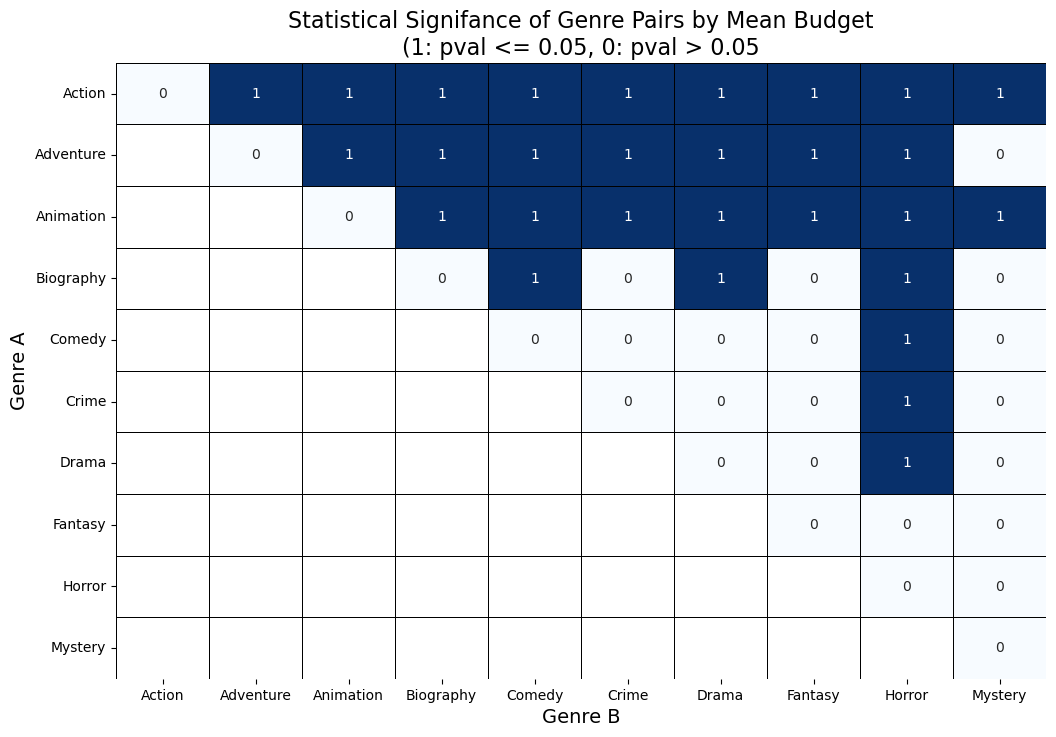

In [609]:
# visualize the genre pairs that are statistically distinct with regards to 
# budget

# ensure both axes are the same
all_genres = sorted(set(posthoc_results_genre_budget['A']).union(set(posthoc_results_genre_budget['B'])))

# pivot table
sig_matrix_genre_budget = (
    posthoc_results_genre_budget
    .pivot(index='A', columns='B', values='pval')
    .reindex(index=all_genres, columns=all_genres, fill_value=1)
    .map(lambda x: 1 if x <= 0.05 else 0)
)

# set diagonal values = 0
np.fill_diagonal(sig_matrix_genre_budget.values, 0)

# mask the lower triangle
mask = np.tril(np.ones_like(sig_matrix_genre_budget, dtype=bool), k=-1)

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(sig_matrix_genre_budget, cmap='Blues', cbar=False, linewidths=0.5,
            linecolor='black', annot=True, fmt='d', mask=mask)

plt.title('Statistical Signifance of Genre Pairs by Mean Budget\n(1: pval <= 0.05, 0: pval > 0.05', fontsize=16)
plt.xlabel('Genre B', fontsize=14)
plt.ylabel('Genre A', fontsize=14)
    
plt.show()                    

### gross revenue vs genre

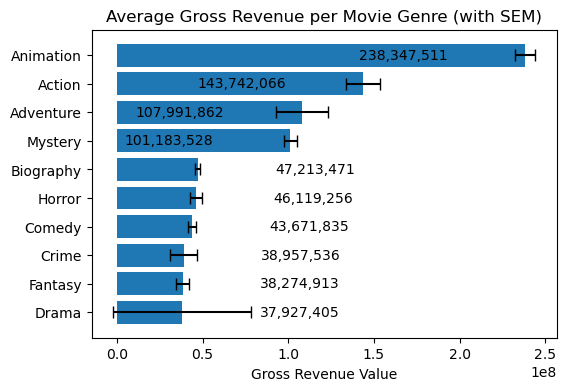

In [534]:
# which genres produce the greatest gross revenue?  

fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_genres10, 
                   'genre', 
                   'gross',
                   xlabel = 'Gross Revenue Value',
                   title = 'Average Gross Revenue per Movie Genre (with SEM)',
                   decimal_places = 0,
                  error_type = 'sem',
                   text_offset = 0.19,
                  ax = ax)

plt.show()

The mean gross revenue for the set of genres mostly follows the same order as the mean budget, which makes sense.  There is some changes in order of the bottom 5.  But all are likely to be the statistically the same avg gross values.  The size of the SEM bars are larger for the mean gross groups compared to the mean budget groups, which means that there is less confidence that the sample mean represents the population mean. especially for the drama genre.  

In [535]:
# Levene's test for equal variance between groups

levenes_test(filtered_genres10, 'genre', 'gross')

Levene's test p-value: 0.0000


In [536]:
# variance effect size

var_gross_genre = filtered_genres10.groupby('genre')['gross'].var()
print(var_gross_genre)

genre
Action       6.027683e+16
Adventure    4.150167e+16
Animation    8.017530e+16
Biography    6.752819e+15
Comedy       4.943996e+15
Crime        5.869806e+15
Drama        8.928543e+15
Fantasy      2.849493e+15
Horror       5.275328e+15
Mystery      3.264409e+16
Name: gross, dtype: float64


The Levene's test indicates heterscedasticity.

The effect of the variance is quite large indicating that the gross revenue values are widely disperesed around the mean within each genre group.

In [537]:
# Welch's ANOVA to test for statistical difference between any two groups

welchs_anova(filtered_genres10, 'genre', 'gross')

  Source  ddof1     ddof2          F         p-unc       np2
0  genre      9  377.2654  53.184471  8.442582e-62  0.113739


Welch's ANOVA indicates that the variance between at least one group is statistically significant.

The partial eta squared value is medium (np2 = 0.0895), indicating that genre explains ~11% of the variance observed in the mean gross values.

In [540]:
# Games-Howell post-hoc test to determine which groups are statistically different

posthoc_test_genre_gross = posthoc_test(filtered_genres10, 'genre', 'gross')
print(posthoc_test_genre_gross)

Unique values in independent variable:
 ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Animation' 'Mystery']

            A          B       mean(A)       mean(B)          diff  \
0      Action  Adventure  1.437421e+08  1.079919e+08  3.575020e+07   
1      Action  Animation  1.437421e+08  2.383475e+08 -9.460545e+07   
2      Action  Biography  1.437421e+08  4.721347e+07  9.652859e+07   
3      Action     Comedy  1.437421e+08  4.367183e+07  1.000702e+08   
4      Action      Crime  1.437421e+08  3.895754e+07  1.047845e+08   
5      Action      Drama  1.437421e+08  3.792741e+07  1.058147e+08   
6      Action    Fantasy  1.437421e+08  3.827491e+07  1.054672e+08   
7      Action     Horror  1.437421e+08  4.611926e+07  9.762281e+07   
8      Action    Mystery  1.437421e+08  1.011835e+08  4.255854e+07   
9   Adventure  Animation  1.079919e+08  2.383475e+08 -1.303556e+08   
10  Adventure  Biography  1.079919e+08  4.721347e+07  6.077839e+07   
11  Adventure    

In [541]:
# output only the genre pairs that are statisically different from each other 
# based on mean gross revenue

sig_posthoc_pairs_genre_gross = posthoc_test_genre_gross[posthoc_test_genre_gross['pval'] < 0.05]

print('The following pairs of genres are statstically distinct based on mean gross revenue\n')
print(sig_posthoc_pairs_genre_gross)

The following pairs of genres are statstically distinct based on mean gross revenue

            A          B       mean(A)       mean(B)          diff  \
1      Action  Animation  1.437421e+08  2.383475e+08 -9.460545e+07   
2      Action  Biography  1.437421e+08  4.721347e+07  9.652859e+07   
3      Action     Comedy  1.437421e+08  4.367183e+07  1.000702e+08   
4      Action      Crime  1.437421e+08  3.895754e+07  1.047845e+08   
5      Action      Drama  1.437421e+08  3.792741e+07  1.058147e+08   
6      Action    Fantasy  1.437421e+08  3.827491e+07  1.054672e+08   
7      Action     Horror  1.437421e+08  4.611926e+07  9.762281e+07   
9   Adventure  Animation  1.079919e+08  2.383475e+08 -1.303556e+08   
10  Adventure  Biography  1.079919e+08  4.721347e+07  6.077839e+07   
11  Adventure     Comedy  1.079919e+08  4.367183e+07  6.432003e+07   
12  Adventure      Crime  1.079919e+08  3.895754e+07  6.903433e+07   
13  Adventure      Drama  1.079919e+08  3.792741e+07  7.006446e+07   
14  A

In [542]:
# output only the genre pairs that are NOT statisically different from each other 
# based on mean gross revenue

insig_posthoc_pairs_genre_gross = posthoc_test_genre_gross[posthoc_test_genre_gross['pval'] > 0.05]

print('The following pairs of genres are NOT statstically distinct based on mean gross revenue\n')
print(insig_posthoc_pairs_genre_gross)

The following pairs of genres are NOT statstically distinct based on mean gross revenue

            A          B       mean(A)       mean(B)          diff  \
0      Action  Adventure  1.437421e+08  1.079919e+08  3.575020e+07   
8      Action    Mystery  1.437421e+08  1.011835e+08  4.255854e+07   
16  Adventure    Mystery  1.079919e+08  1.011835e+08  6.808335e+06   
23  Animation    Mystery  2.383475e+08  1.011835e+08  1.371640e+08   
24  Biography     Comedy  4.721347e+07  4.367183e+07  3.541637e+06   
25  Biography      Crime  4.721347e+07  3.895754e+07  8.255935e+06   
26  Biography      Drama  4.721347e+07  3.792741e+07  9.286066e+06   
27  Biography    Fantasy  4.721347e+07  3.827491e+07  8.938559e+06   
28  Biography     Horror  4.721347e+07  4.611926e+07  1.094216e+06   
29  Biography    Mystery  4.721347e+07  1.011835e+08 -5.397006e+07   
30     Comedy      Crime  4.367183e+07  3.895754e+07  4.714299e+06   
31     Comedy      Drama  4.367183e+07  3.792741e+07  5.744429e+06   
3

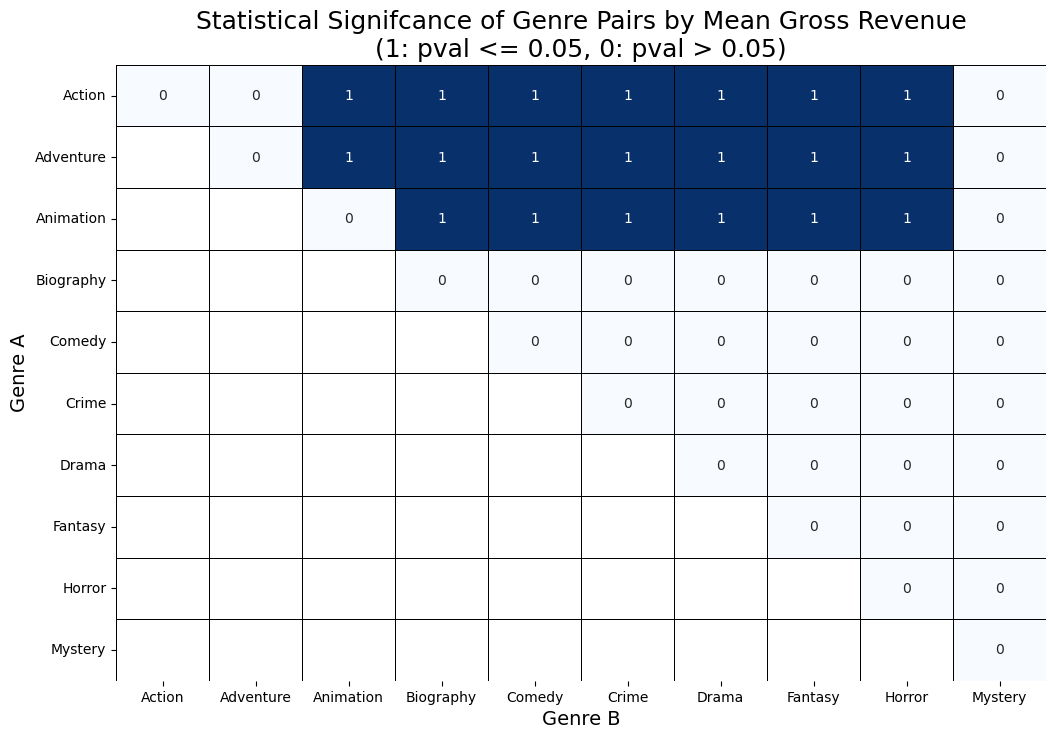

In [608]:
# visualize the genre pairs that are statistically disctinct with regards to 
# gross revenue.

# ensure that both axes of the pivot table have the same set of genres
all_genres = sorted(set(posthoc_test_genre_gross['A']).union(set(posthoc_test_genre_gross['B'])))

# pivot table
sig_matrix_genre_gross = (
    posthoc_test_genre_gross
    .pivot(index='A', columns='B', values='pval')
    .reindex(index=all_genres, columns=all_genres, fill_value=1)
    .map(lambda x: 1 if x <= 0.05 else 0)
)

# set diagonal values = 0
np.fill_diagonal(sig_matrix_genre_gross.values, 0)

# mask the lower triangle
mask = np.tril(np.ones_like(sig_matrix_genre_gross, dtype=bool), k=-1)

# plot
plt.figure(figsize=(12,8))
sns.heatmap(sig_matrix_genre_gross, cmap='Blues', cbar=False, linewidth=0.5,
            linecolor='black', annot=True, fmt='d', mask=mask)

plt.title('Statistical Signifcance of Genre Pairs by Mean Gross Revenue\n(1: pval <= 0.05, 0: pval > 0.05)', fontsize = 18)
plt.xlabel('Genre B', fontsize=14)
plt.ylabel('Genre A', fontsize=14)

plt.show()

As somewhat apparent in the gross revenue vs genre barplot, the above pairs of genres are not statistically distinct with regards to mean gross revenue:

We can conclude that the animation genre has the largest mean gross revenue.  The action, adventure, and mystery genres are not statistically distinct, and collectly occupy second place.  The remaining genres are in third place.  

### profit vs genre

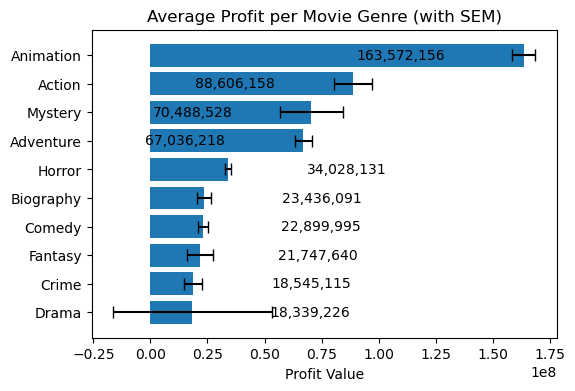

In [550]:
# What is the "profit" (gross - budget)?

filtered_genres_copy = filtered_genres10.copy()
filtered_genres_copy['profit'] = filtered_genres_copy['gross'] - filtered_genres_copy['budget']

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_genres_copy, 
                   'genre', 
                   'profit',
                   xlabel = 'Profit Value',
                   title = 'Average Profit per Movie Genre (with SEM)',
                   error_type = 'sem',
                   decimal_places = 0,
                   text_offset = 0.21,
                  ax = ax)

plt.show()

In [551]:
# perform Levene's test for equal variance

levenes_test(filtered_genres_copy, 'genre', 'profit')

Levene's test p-value: 0.0000


In [552]:
# check effect size

var_profit_genre = filtered_genres_copy.groupby('genre')['profit'].var()
print(var_profit_genre)

genre
Action       4.369166e+16
Adventure    2.993034e+16
Animation    6.467944e+16
Biography    5.766198e+15
Comedy       3.917424e+15
Crime        4.583996e+15
Drama        7.319988e+15
Fantasy      1.406118e+15
Horror       4.788114e+15
Mystery      2.427304e+16
Name: profit, dtype: float64


The Levene's test indicates heterscedasticity.

The effect of the variance is quite large indicating that the profit values differ substantially, widely spread out from the mean, within genre groups. 

In [154]:
# Welch's ANOVA to determine if any groups are statistically different

welchs_anova(filtered_genres_copy, 'genre', 'profit')

  Source  ddof1        ddof2          F         p-unc       np2
0  genre      4  1821.444335  43.407766  7.788235e-35  0.054794


The Welch's ANOVA indicates that the mean profits for one group is statistically different from at least one other rating group.  

The partial eta squared value (np2) indicates a medium degree of variance.  The topp 5 ratings group accounts for ~5.5% of variance in profit between genre groups.  

In [553]:
# Games-Howell post-hoc test to determine which groups are statistically distinct

posthoc_genre_profit = posthoc_test(filtered_genres_copy, 'genre', 'profit')
print(posthoc_genre_profit)

Unique values in independent variable:
 ['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Animation' 'Mystery']

            A          B       mean(A)       mean(B)          diff  \
0      Action  Adventure  8.860616e+07  6.703622e+07  2.156994e+07   
1      Action  Animation  8.860616e+07  1.635722e+08 -7.496600e+07   
2      Action  Biography  8.860616e+07  2.343609e+07  6.517007e+07   
3      Action     Comedy  8.860616e+07  2.289999e+07  6.570616e+07   
4      Action      Crime  8.860616e+07  1.854511e+07  7.006104e+07   
5      Action      Drama  8.860616e+07  1.833923e+07  7.026693e+07   
6      Action    Fantasy  8.860616e+07  2.174764e+07  6.685852e+07   
7      Action     Horror  8.860616e+07  3.402813e+07  5.457803e+07   
8      Action    Mystery  8.860616e+07  7.048853e+07  1.811763e+07   
9   Adventure  Animation  6.703622e+07  1.635722e+08 -9.653594e+07   
10  Adventure  Biography  6.703622e+07  2.343609e+07  4.360013e+07   
11  Adventure    

In [554]:
# Posthoc test results for genre pairs that are statistically distinct with
# regards to profit (gross - budget)

sig_pairs_genre_profit = posthoc_genre_profit[posthoc_genre_profit['pval'] < 0.05]

print('Genre pairs that are statistically different by Profit\n')
print(sig_pairs_genre_profit)

Genre pairs that are statistically different by Profit

            A          B       mean(A)       mean(B)          diff  \
1      Action  Animation  8.860616e+07  1.635722e+08 -7.496600e+07   
2      Action  Biography  8.860616e+07  2.343609e+07  6.517007e+07   
3      Action     Comedy  8.860616e+07  2.289999e+07  6.570616e+07   
4      Action      Crime  8.860616e+07  1.854511e+07  7.006104e+07   
5      Action      Drama  8.860616e+07  1.833923e+07  7.026693e+07   
6      Action    Fantasy  8.860616e+07  2.174764e+07  6.685852e+07   
7      Action     Horror  8.860616e+07  3.402813e+07  5.457803e+07   
9   Adventure  Animation  6.703622e+07  1.635722e+08 -9.653594e+07   
10  Adventure  Biography  6.703622e+07  2.343609e+07  4.360013e+07   
11  Adventure     Comedy  6.703622e+07  2.289999e+07  4.413622e+07   
12  Adventure      Crime  6.703622e+07  1.854511e+07  4.849110e+07   
13  Adventure      Drama  6.703622e+07  1.833923e+07  4.869699e+07   
14  Adventure    Fantasy  6.703622

In [555]:
# Posthoc test results for genre pairs that are NOT statistically distinct with
# regards to profit (gross - budget)

insig_pairs_genre_profit = posthoc_genre_profit[posthoc_genre_profit['pval'] > 0.05]

print('Genre pairs that are NOT statistically different by Profit\n')
print(insig_pairs_genre_profit)

Genre pairs that are NOT statistically different by Profit

            A          B       mean(A)       mean(B)          diff  \
0      Action  Adventure  8.860616e+07  6.703622e+07  2.156994e+07   
8      Action    Mystery  8.860616e+07  7.048853e+07  1.811763e+07   
16  Adventure    Mystery  6.703622e+07  7.048853e+07 -3.452309e+06   
23  Animation    Mystery  1.635722e+08  7.048853e+07  9.308363e+07   
24  Biography     Comedy  2.343609e+07  2.289999e+07  5.360959e+05   
25  Biography      Crime  2.343609e+07  1.854511e+07  4.890976e+06   
26  Biography      Drama  2.343609e+07  1.833923e+07  5.096864e+06   
27  Biography    Fantasy  2.343609e+07  2.174764e+07  1.688450e+06   
28  Biography     Horror  2.343609e+07  3.402813e+07 -1.059204e+07   
29  Biography    Mystery  2.343609e+07  7.048853e+07 -4.705244e+07   
30     Comedy      Crime  2.289999e+07  1.854511e+07  4.354880e+06   
31     Comedy      Drama  2.289999e+07  1.833923e+07  4.560768e+06   
32     Comedy    Fantasy  2.28

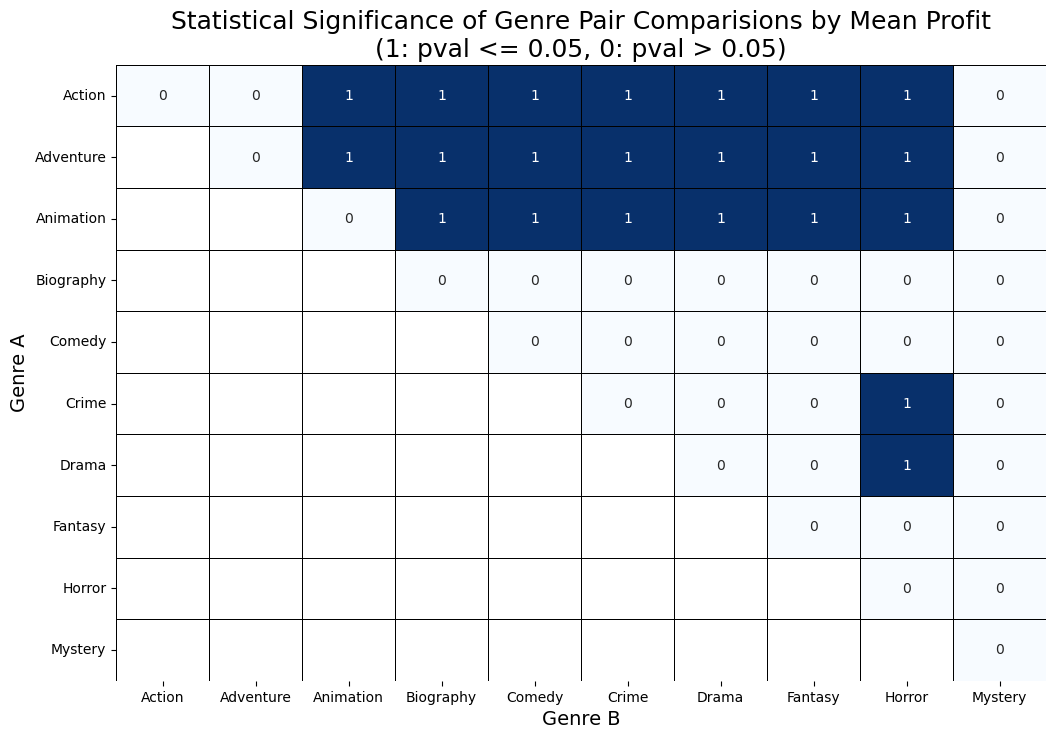

In [611]:
# visualize the statistically distinct genre pairs for mean profit

# ensure that both axes are the same with regards to genres
all_genres = sorted(
    set(posthoc_genre_profit['A'])
    .union(set(posthoc_genre_profit['B']))
)

# pivot table
sig_matrix_genre_profit = (
    posthoc_genre_profit
    .pivot(index='A', columns='B', values='pval')
    .reindex(index=all_genres, columns=all_genres, fill_value=1)
    .map(lambda x: 1 if x <= 0.05 else 0)
)

# set the diagonal values = 0
np.fill_diagonal(sig_matrix_genre_profit.values, 0)

# mask the lower triangle
mask = np.tril(np.ones_like(sig_matrix_genre_profit, dtype=bool), k=-1)

# plot
plt.figure(figsize=(12,8))
sns.heatmap(sig_matrix_genre_profit, cmap='Blues', cbar=False, linewidth=0.5,
            linecolor='black', annot=True, fmt='d', mask=mask)

plt.title('Statistical Significance of Genre Pair Comparisions by Mean Profit\n(1: pval <= 0.05, 0: pval > 0.05)', fontsize=18)
plt.xlabel('Genre B', fontsize = 14)
plt.ylabel('Genre A', fontsize = 14)

plt.show()

## director - analysis

In [208]:
print(df['director'].value_counts().head(20))

director
Woody Allen          38
Clint Eastwood       31
Directors            28
Steven Spielberg     27
Ron Howard           24
Steven Soderbergh    23
Ridley Scott         23
Joel Schumacher      22
Barry Levinson       20
Martin Scorsese      19
Tim Burton           19
Garry Marshall       18
Oliver Stone         18
Spike Lee            17
Sidney Lumet         17
Robert Zemeckis      17
Richard Linklater    17
Stephen Frears       17
Brian De Palma       17
Walter Hill          17
Name: count, dtype: int64


In [209]:
print(df['director'].value_counts().tail(20))

director
Léa Pool               1
Hironobu Sakaguchi     1
Jordan Melamed         1
Éva Gárdos             1
Jim Sotos              1
Blair Hayes            1
Louis C.K.             1
Gregory Poirier        1
Robert Boris           1
Tom Green              1
Brendan Malloy         1
Mark Buntzman          1
Daniel Sackheim        1
Demian Lichtenstein    1
Peter Webb             1
Marcelo Epstein        1
Thomas Rickman         1
Paolo Taviani          1
Lawrence Dane          1
Pereko Mosia           1
Name: count, dtype: int64


### score vs director

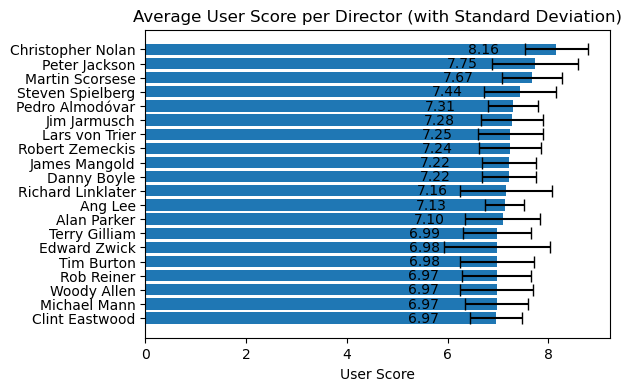

In [296]:
# It looks like many directors have no more than one score.  So, I will first filter directors 
# with more than 10 scores and plot the top 20 from that filtered list.  

filtered_directors = df.groupby('director').filter(lambda x: len(x) > 10)
top20_directors = (
    filtered_directors.groupby('director')['score']
    .mean()
    .nlargest(20)
    .index.tolist()
)
filtered_top20_directors = filtered_directors[filtered_directors['director'].isin(top20_directors)]

fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_directors,
                 'director', 
                 'score',
                 xlabel = 'User Score',
                 title = 'Average User Score per Director (with Standard Deviation)',
                  error_type = 'std',
                  text_offset = 0.14,
                  ax = ax)

plt.show()

Here I used standard deviation to describe the variability in the user sccores for each director.  Both standard deviation (std) and standard error of the mean (sem) are listed below for reference.  

In [625]:
# comparing std and sem for the top 20 directors

director_stats['sem'] = filtered_top20_directors.groupby('director')['score'].sem()

# sort the values
director_stats_sorted = director_stats.sort_values(by='mean', ascending=False)

print(director_stats_sorted)

                       mean       std       sem
director                                       
Christopher Nolan  8.163636  0.600454  0.181044
Peter Jackson      7.745455  0.744800  0.224566
Martin Scorsese    7.673684  0.540414  0.123979
Steven Spielberg   7.440741  0.691297  0.133040
Pedro Almodóvar    7.307143  0.393142  0.105072
Jim Jarmusch       7.281818  0.622605  0.187722
Lars von Trier     7.245455  0.529837  0.159752
Robert Zemeckis    7.241176  0.736596  0.178651
James Mangold      7.218182  0.647793  0.195317
Danny Boyle        7.215385  0.494716  0.137209
Richard Linklater  7.158824  0.674591  0.163612
Ang Lee            7.133333  0.853158  0.246286
Alan Parker        7.100000  0.629574  0.181742
Terry Gilliam      6.990909  0.716177  0.215935
Edward Zwick       6.984615  0.621619  0.172406
Tim Burton         6.984211  0.630047  0.144543
Rob Reiner         6.975000  1.046582  0.261645
Woody Allen        6.973684  0.517104  0.083885
Michael Mann       6.972727  0.911143  0

### budget vs director

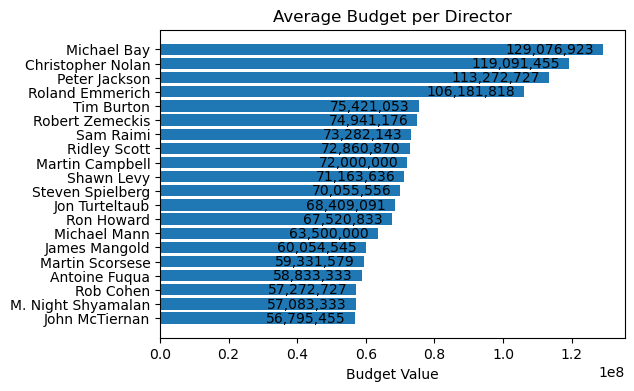

In [297]:
# what is the average budget for the top 20 directors 
# (with more than 10 movies)?

filtered_directors = df.groupby('director').filter(lambda x: len(x) > 10)
top20_directors_budget = (
    filtered_directors.groupby('director')['budget']
    .mean()
    .nlargest(20)
    .index.tolist()
)
filtered_top20_directors_budget = filtered_directors[filtered_directors['director'].isin(top20_directors_budget)]

# plot
fig, ax = plt.subplots(figsize=(6,4))

barplot_with_error(filtered_top20_directors_budget, 
                   'director', 
                   'budget',
                   xlabel = 'Budget Value',
                   title = 'Average Budget per Director',
                   error_type = None,
                   decimal_places = 0,
                   text_offset = 0.02,
                   ax = ax)

plt.show()

In [287]:
# comparing std and sem for the mean budgets of the top 20 directors

director_budgets = filtered_top20_directors_budget.groupby('director')['budget'].agg(
    count='size', mean='mean', std='std', sem='sem').reset_index()

# sort the values
director_budgets_sorted = director_budgets.sort_values(by='mean', ascending=False)

print('Top 20 Producers by Mean Budget')
print()
print(director_budgets_sorted)

Top 20 Producers by Mean Budget

              director  count          mean           std           sem
8          Michael Bay     13  1.290769e+08  6.847197e+07  1.899071e+07
1    Christopher Nolan     11  1.190915e+08  8.477115e+07  2.555946e+07
10       Peter Jackson     11  1.132727e+08  8.872214e+07  2.675073e+07
14     Roland Emmerich     11  1.061818e+08  5.606571e+07  1.690445e+07
19          Tim Burton     19  7.542105e+07  5.871429e+07  1.346998e+07
13     Robert Zemeckis     17  7.494118e+07  5.361491e+07  1.300353e+07
16           Sam Raimi     14  7.328214e+07  9.054929e+07  2.420032e+07
11        Ridley Scott     23  7.286087e+07  4.813905e+07  1.003769e+07
6      Martin Campbell     12  7.200000e+07  5.577389e+07  1.610054e+07
17          Shawn Levy     11  7.116364e+07  4.738369e+07  1.428672e+07
18    Steven Spielberg     27  7.005556e+07  4.751079e+07  9.143457e+06
4       Jon Turteltaub     11  6.840909e+07  5.270902e+07  1.589237e+07
15          Ron Howard     24  

Both the standard deviations (std) and standard error of the means (sem) are very large for all of the top 20 directors.  

A large STD means that the budgets for all directors vary greatly.  

The large SEM values are harder to interpret since the sample size is pretty small for all directors (even though production of 38 movies seems like quite a lot!).  

### gross revenue vs director

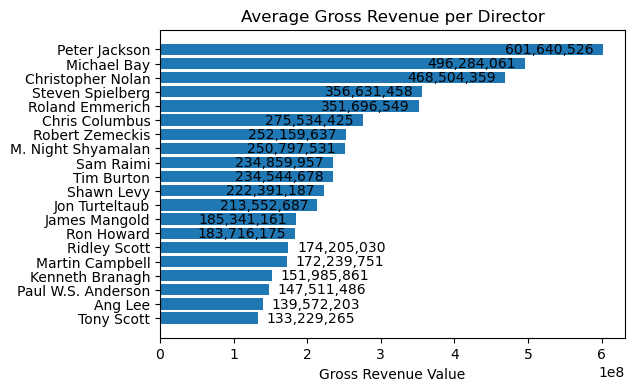

In [298]:
# which director generated the greates average gross revenue?

filtered_directors = df.groupby('director').filter(lambda x: len(x) > 10)
top20_directors_gross = (
    filtered_directors.groupby('director')['gross']
    .mean()
    .nlargest(20)
    .index.tolist()
)
filtered_top20_directors_gross = filtered_directors[filtered_directors['director'].isin(top20_directors_gross)]

fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_directors_gross,
                   'director', 
                   'gross',
                   xlabel = 'Gross Revenue Value',
                   title = 'Average Gross Revenue per Director',
                   error_type = None,
                   decimal_places = 0,
                   text_offset = 0.02,
                   ax = ax)

plt.show()

In [261]:
# comparing std and sem for mean gross revenue of the top 20 directors

director_gross = filtered_top20_directors_gross.groupby('director')['gross'].agg(
    count='size', mean='mean', std='std', sem='sem').reset_index()

# sort the values
director_gross_sorted = director_gross.sort_values(by='mean', ascending=False)

print(director_gross_sorted)

              director  count          mean           std           sem
10       Peter Jackson     11  6.016405e+08  4.733892e+08  1.427322e+08
8          Michael Bay     13  4.962841e+08  3.656013e+08  1.013996e+08
2    Christopher Nolan     11  4.685044e+08  3.918293e+08  1.181410e+08
17    Steven Spielberg     27  3.566315e+08  2.501463e+08  4.814067e+07
13     Roland Emmerich     11  3.516965e+08  2.712919e+08  8.179760e+07
1       Chris Columbus     15  2.755344e+08  3.124135e+08  8.066482e+07
12     Robert Zemeckis     17  2.521596e+08  1.620713e+08  3.930807e+07
6   M. Night Shyamalan     12  2.507975e+08  1.741990e+08  5.028692e+07
15           Sam Raimi     14  2.348600e+08  3.498150e+08  9.349199e+07
18          Tim Burton     19  2.345447e+08  2.362028e+08  5.418863e+07
16          Shawn Levy     11  2.223912e+08  1.697408e+08  5.117876e+07
4       Jon Turteltaub     11  2.135527e+08  1.643224e+08  4.954506e+07
3        James Mangold     11  1.853412e+08  1.884587e+08  5.682

### profit vs director

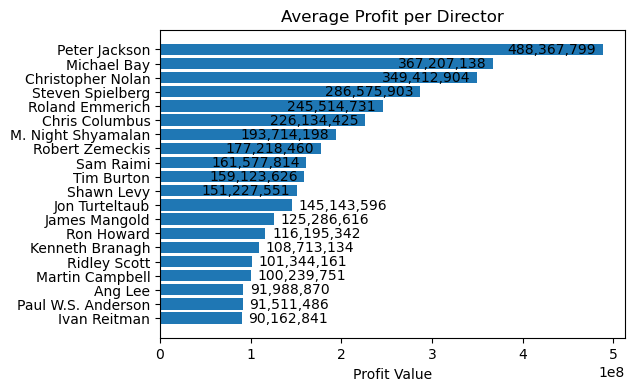

In [299]:
# which directors have the highest average profit margin (calculated as gross - budget)?

# filter directors with more than 10 movies
filtered_directors = df.groupby('director').filter(lambda x: len(x) > 10)

# compute the average profit per director
filtered_directors['profit'] = filtered_directors['gross'] - filtered_directors['budget']

# select the top 20 directors by average profit
top20_directors_profit = (
    filtered_directors.groupby('director')['profit']
    .mean()
    .nlargest(20)
    .index.tolist()
)

# filter dataset to only include the top 20 directors based on mean profit
filtered_top20_directors_profit = filtered_directors[filtered_directors['director']
.isin(top20_directors_profit)]

# plot
fig, ax = plt.subplots(figsize=(6,4))

barplot_with_error(filtered_top20_directors_profit,
                   'director',
                   'profit',
                   xlabel = 'Profit Value',
                   title = 'Average Profit per Director',
                   error_type = None,
                   decimal_places = 0,
                   text_offset = 0.015,
                   ax = ax)

plt.show()

In [295]:
# comparing std and sem for mean profit of the top 20 directors

director_profit = filtered_top20_directors_profit.groupby('director')['profit'].agg(
    count='size', mean='mean', std='std', sem='sem').reset_index()

# sort the values
director_profit_sorted = director_profit.sort_values(by='mean', ascending=False)

print(director_profit_sorted)

              director  count          mean           std           sem
11       Peter Jackson     11  4.883678e+08  4.162782e+08  1.255126e+08
9          Michael Bay     13  3.672071e+08  3.100436e+08  8.599063e+07
2    Christopher Nolan     11  3.494129e+08  3.218616e+08  9.704491e+07
18    Steven Spielberg     27  2.865759e+08  2.385435e+08  4.590771e+07
14     Roland Emmerich     11  2.455147e+08  2.438747e+08  7.353099e+07
1       Chris Columbus     15  2.261344e+08  2.905223e+08  7.501253e+07
7   M. Night Shyamalan     12  1.937142e+08  1.705073e+08  4.922122e+07
13     Robert Zemeckis     17  1.772185e+08  1.609263e+08  3.903036e+07
16           Sam Raimi     14  1.615778e+08  2.693117e+08  7.197658e+07
19          Tim Burton     19  1.591236e+08  1.932361e+08  4.433139e+07
17          Shawn Levy     11  1.512276e+08  1.320453e+08  3.981316e+07
5       Jon Turteltaub     11  1.451436e+08  1.341198e+08  4.043865e+07
4        James Mangold     11  1.252866e+08  1.598677e+08  4.820

In [302]:
# create a datatable with top 20 directors, in descending order, in each of the 
# four categories of score, budget, gross, and profit

# create the dataframe
top_directors_df = pd.DataFrame({
    'Rank': list(range(1,21)),
    'Score': top20_directors,
    'Budget': top20_directors_budget,
    'Gross': top20_directors_gross,
    'Profit': top20_directors_profit
})

# set rank as the index
top_directors_df.set_index('Rank', inplace=True)

print('Top 20 Directors in Each of Four Categories')
print()
print(top_directors_df)

Top 20 Directors in Each of Four Categories

                  Score              Budget               Gross  \
Rank                                                              
1     Christopher Nolan         Michael Bay       Peter Jackson   
2         Peter Jackson   Christopher Nolan         Michael Bay   
3       Martin Scorsese       Peter Jackson   Christopher Nolan   
4      Steven Spielberg     Roland Emmerich    Steven Spielberg   
5       Pedro Almodóvar          Tim Burton     Roland Emmerich   
6          Jim Jarmusch     Robert Zemeckis      Chris Columbus   
7        Lars von Trier           Sam Raimi     Robert Zemeckis   
8       Robert Zemeckis        Ridley Scott  M. Night Shyamalan   
9         James Mangold     Martin Campbell           Sam Raimi   
10          Danny Boyle          Shawn Levy          Tim Burton   
11    Richard Linklater    Steven Spielberg          Shawn Levy   
12              Ang Lee      Jon Turteltaub      Jon Turteltaub   
13          Alan 

The datatable above summarizes the comparison of the top 20 directors based on avg user score, avg budget, avg gross revenue, and avg profit for directors with more than 10 movies and in descending order for each feature (highest at the top).  

Some interesting observations:
- Michale Bay is in the top 2 for budget, gross, and profit, yet doesn't appear in the top 20 based on user scores.  Roland Emmerich, Sam Raimi, Ridley Scott, Martin Campbell, Shawn Levy, Jon Turteltaub, and Ron Howard also are on the avg budget, avg gross, and avg profit top 20, but not in the top 20 of user scores.  

- Antoine Fuqua, Rob Cohen have top 20 budgets, on average, but not top 20 in any other category.

- Michael Mann has the 14th highest average budget but doesn't appear in the top 20 for average gross revenue or average profit.  But, his is ranked 19 in average user score.

- Martin Scorsese has the 16th highest average budget but doesn't appear in the top 20 for average gross revenue or average profit.  He is ranked 3rd in average user score.

- John McTiernan has the 20th highest average budget, but doesn't appear in any of the other lists. He directed 'Predator', 'Die Hard', and 'The Hunt for Red October'!

In [345]:
# Run some stats on the profit margins

# Levene's test for equal variance

levenes_test(filtered_top20_directors_profit, 'director', 'profit')

Levene's test p-value: 0.0003


In [346]:
# check effect size

var_profit_director = filtered_top20_directors_profit.groupby('director')['profit'].var()

print(var_profit_director)

director
Ang Lee               2.132718e+16
Chris Columbus        8.440320e+16
Christopher Nolan     1.035949e+17
Ivan Reitman          8.114799e+15
James Mangold         2.555768e+16
Jon Turteltaub        1.798813e+16
Kenneth Branagh       2.595956e+16
M. Night Shyamalan    2.907274e+16
Martin Campbell       2.221421e+16
Michael Bay           9.612705e+16
Paul W.S. Anderson    1.076648e+16
Peter Jackson         1.732875e+17
Ridley Scott          1.937635e+16
Robert Zemeckis       2.589727e+16
Roland Emmerich       5.947487e+16
Ron Howard            2.364952e+16
Sam Raimi             7.252879e+16
Shawn Levy            1.743597e+16
Steven Spielberg      5.690298e+16
Tim Burton            3.734017e+16
Name: profit, dtype: float64


The Levene's test indicates that the dataset is heteroscedastic.

The effect of the variance is quite large indicating that the profit values differ substantially, widely spread out from the mean, within director groups. 

In [347]:
# Welch's ANOVA to determine if any groups are statistically distinct

welchs_anova(filtered_top20_directors_profit, 'director', 'profit')

     Source  ddof1      ddof2         F     p-unc       np2
0  director     19  89.857052  2.183669  0.007536  0.195338


The Welch's ANOVA indicates that the mean profits for one group is statistically different from at least one other rating group.  

The p-value is < 0.05 so at least one pair of directors are statistically different in net revenue.

The partial eta squared value (np2) indicates a large degree of variance.  The top 20 directors grouping accounts for ~20% of variance in profit.

In [613]:
# Games-Howell post-hoc test to determine which groups are statistically distinct

posthoc_director_profit = posthoc_test(filtered_top20_directors_profit, 'director', 'profit')
print(posthoc_director_profit)

Unique values in independent variable:
 ['Steven Spielberg' 'Sam Raimi' 'Ivan Reitman' 'Ridley Scott' 'Ron Howard'
 'Robert Zemeckis' 'Tim Burton' 'Chris Columbus' 'Martin Campbell'
 'Kenneth Branagh' 'Roland Emmerich' 'Peter Jackson' 'Jon Turteltaub'
 'Ang Lee' 'Paul W.S. Anderson' 'Michael Bay' 'James Mangold'
 'Christopher Nolan' 'M. Night Shyamalan' 'Shawn Levy']

                    A                  B       mean(A)       mean(B)  \
0             Ang Lee     Chris Columbus  9.198887e+07  2.261344e+08   
1             Ang Lee  Christopher Nolan  9.198887e+07  3.494129e+08   
2             Ang Lee       Ivan Reitman  9.198887e+07  9.016284e+07   
3             Ang Lee      James Mangold  9.198887e+07  1.252866e+08   
4             Ang Lee     Jon Turteltaub  9.198887e+07  1.451436e+08   
..                ...                ...           ...           ...   
185         Sam Raimi   Steven Spielberg  1.615778e+08  2.865759e+08   
186         Sam Raimi         Tim Burton  1.615778e+0

Due to the number of pairings for the ad-hoc test, I am not going to output significant vs insignificant differences between directors based on profit.  But, I will generate a pivot table in hopes that it will be clear enough to read and understand.    

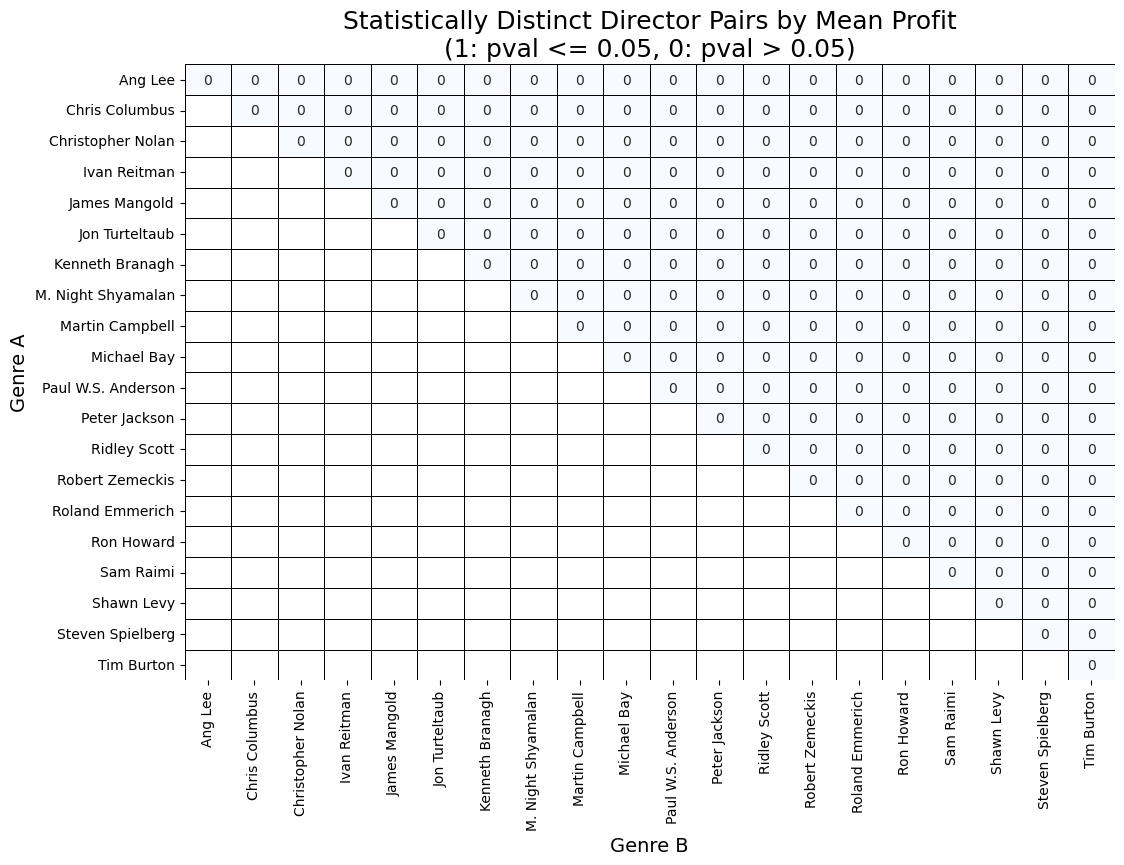

In [614]:
# find the pairs of directors that are statistically distinct by mean profit, 
# based on the Games-Howell posthoc test results
sig_pairs_director_profit = posthoc_director_profit[posthoc_director_profit['pval'] < 0.05]

# ensure that both axes of the pivot table are identical for directors
all_directors = sorted(
    set(posthoc_director_profit['A'])
    .union(set(posthoc_director_profit['B']))
)

# pivot table
sig_matrix_director_profit = (
    posthoc_director_profit
    .pivot(index='A', columns='B', values='pval')
    .reindex(index=all_directors, columns=all_directors, fill_value=1)
    .map(lambda x: 1 if x <= 0.05 else 0)
)

# ensure that the diagonal values = 0
np.fill_diagonal(sig_matrix_director_profit.values, 0)

# mask the bottom triangle
mask = np.tril(np.ones_like(sig_matrix_director_profit, dtype=bool), k=-1)

# plot
plt.figure(figsize=(12,8))
sns.heatmap(sig_matrix_director_profit, cmap='Blues', cbar=False, linewidth=0.5,
            linecolor='black', annot=True, fmt='d', mask=mask)

plt.title('Statistically Distinct Director Pairs by Mean Profit\n(1: pval <= 0.05, 0: pval > 0.05)', fontsize=18)
plt.xlabel('Genre B', fontsize=14)
plt.ylabel('Genre A', fontsize=14)

plt.show()

In [617]:
# apparently no director is statistically different than any other director.

# I will print the list of statistically different pairs of directors by
# mean profit, from the Games-Howell posthoc test results.

print(sig_pairs_director_profit)

Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, T, df, pval, hedges]
Index: []


In [620]:
posthoc_director_profit.sort_values(by='pval').head(5)

A                 B       mean(A)       mean(B)  \
68         Ivan Reitman  Steven Spielberg  9.016284e+07  2.865759e+08   
152  Paul W.S. Anderson  Steven Spielberg  9.151149e+07  2.865759e+08   
167        Ridley Scott  Steven Spielberg  1.013442e+08  2.865759e+08   
17              Ang Lee  Steven Spielberg  9.198887e+07  2.865759e+08   
182          Ron Howard  Steven Spielberg  1.161953e+08  2.865759e+08   

             diff            se         T         df      pval    hedges  
68  -1.964131e+08  5.183769e+07 -3.789001  36.714007  0.052702 -0.955441  
152 -1.950644e+08  5.555438e+07 -3.511234  35.724166  0.102244 -0.909522  
167 -1.852317e+08  5.431361e+07 -3.410411  42.849089  0.119360 -0.915012  
17  -1.945870e+08  6.232803e+07 -3.121983  32.952117  0.232138 -0.885615  
182 -1.703806e+08  5.561398e+07 -3.063628  44.900896  0.244202 -0.825547

Although the Welch's ANOVA results indicate that at least one group of directors are statistically different based on mean profit, the Games-Howell posthoc test failed to find any such pair. The differences detetected by the Welch's ANOVA may not be large enough to be significant with the posthoc test  since it adjusts for unequal variance and multiple comparisons. The lowest pval score for the director comparisons is 0.052. All other pairs have pvals > 0.1.

## writer - analysis

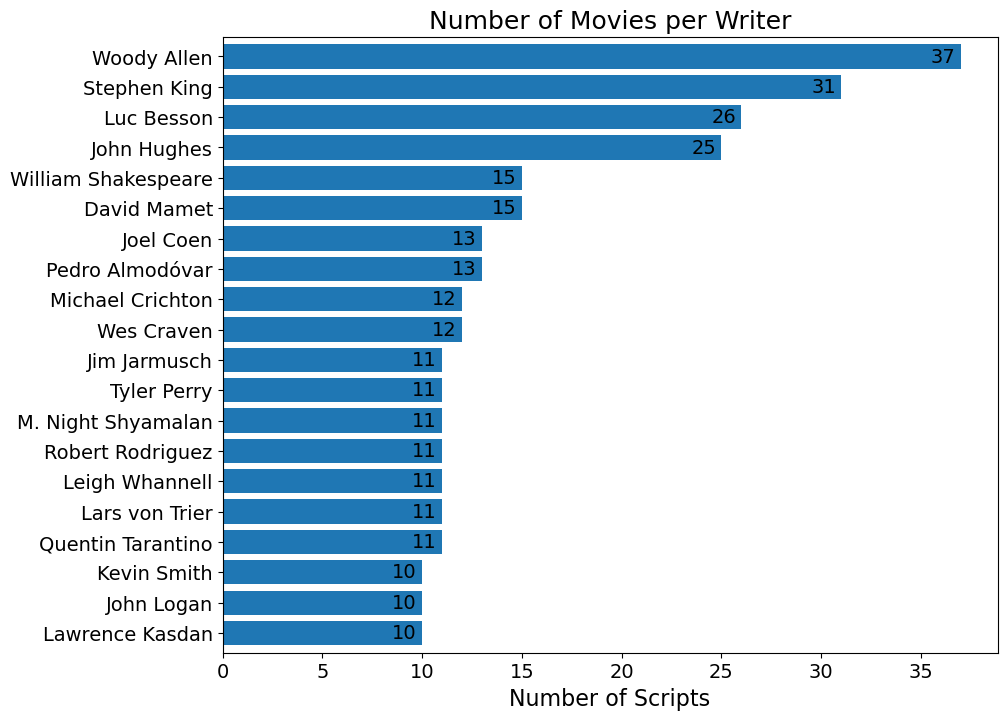

In [329]:
# which writers are the most prolific for movie adaptations and/or scripts?

movies_per_writer = df['writer'].value_counts()
top20_writers = movies_per_writer.head(20)

# plot
fig, ax = plt.subplots(figsize=(10,8))
top20_writers.plot(kind='barh', ax=ax, width=0.8)

# add text labels for value counts per writer
for index, value in enumerate(top20_writers):
    ax.text(value - 1.5, index, str(value), va='center', fontsize=14)

ax.invert_yaxis()

ax.set_xlabel('Number of Scripts', fontsize=16)
ax.set_ylabel('')
ax.set_title('Number of Movies per Writer', fontsize=18)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.show()

### score vs writer

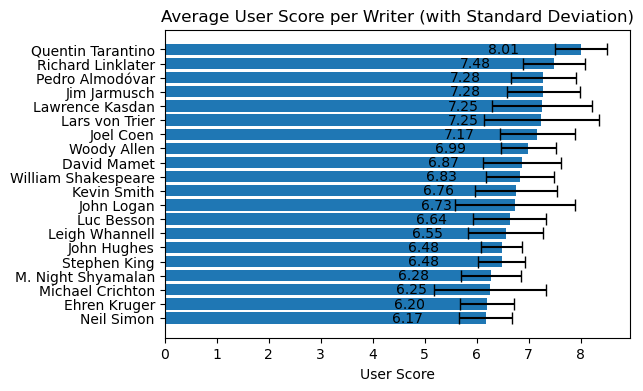

In [342]:
# which writers are associated with movies with the highest user scores

filtered_writers = df.groupby('writer').filter(lambda x: len(x) >= 10)
top20_writers = (
    filtered_writers.groupby('writer')['score']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_writers = filtered_writers[filtered_writers['writer'].isin(top20_writers)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_writers,
                   'writer',
                   'score',
                   xlabel = 'User Score',
                   title = 'Average User Score per Writer (with Standard Deviation)',
                   error_type = 'std',
                   text_offset = 0.15,
                   ax = ax)

plt.show()


In [629]:
# comparing std and sem for the top 20 writers

writer_stats = filtered_top20_writers.groupby('writer')['score'].agg(
    count = 'size',
    mean = 'mean',
    std = 'std',
    sem = 'sem'
)

# sort the values
writer_stats_sorted = writer_stats.sort_values(by='mean', ascending=False)

print('Mean User Scores per Writer Including STD and SEM\n')
print(writer_stats_sorted)

Mean User Scores per Writer Including STD and SEM

                     count      mean       std       sem
writer                                                  
Quentin Tarantino       11  8.009091  0.459248  0.138469
Richard Linklater       10  7.480000  0.578888  0.183060
Pedro Almodóvar         13  7.284615  0.399679  0.110851
Jim Jarmusch            11  7.281818  0.622605  0.187722
Lawrence Kasdan         10  7.250000  0.751665  0.237697
Lars von Trier          11  7.245455  0.529837  0.159752
Joel Coen               13  7.169231  0.701646  0.194602
Woody Allen             37  6.989189  0.515204  0.084699
David Mamet             15  6.866667  0.505211  0.130445
William Shakespeare     15  6.826667  0.527076  0.136091
Kevin Smith             10  6.760000  0.715231  0.226176
John Logan              10  6.730000  1.110605  0.351204
Luc Besson              26  6.638462  0.792503  0.155423
Leigh Whannell          11  6.554545  0.653244  0.196960
John Hughes             25  6.480000 

There is substantial variation in user scores for movies by each writer, especially John Logan, Stephen King, and M. Night Shyamalan.  The widely varying values could be due to a number of factors, including quality of producion, direction, adherence to original writings (if a book preexisted the movie), etc.  

### budget vs writer

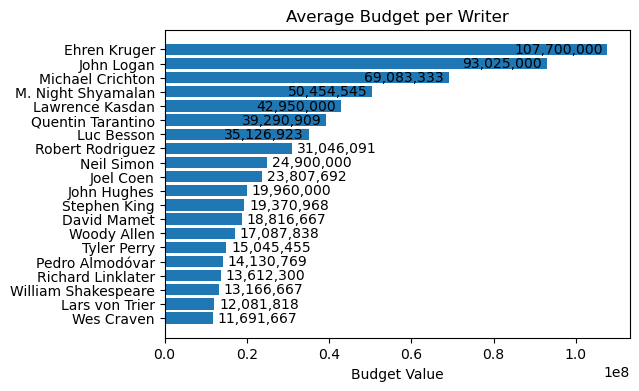

In [355]:
# Which writers are associated with the movies with largest budgets?

filtered_writers = df.groupby('writer').filter(lambda x: len(x) >= 10)
top20_writers_budget = (
    filtered_writers.groupby('writer')['budget']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_writers_budget = filtered_writers[filtered_writers['writer'].isin(top20_writers_budget)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_writers_budget,
                   'writer',
                   'budget',
                   xlabel = 'Budget Value',
                   title = 'Average Budget per Writer',
                   decimal_places = 0,
                   error_type = None,
                   text_offset = 0.011,
                   ax = ax)

plt.show()
    

In [359]:
# instead of showing error bars an the graph, I will print the list with
# the mean, std, and sem values.

writer_budget_stats = filtered_top20_writers_budget.groupby('writer')['budget'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

writer_budget_stats_sorted = writer_budget_stats.sort_values(by='mean', ascending=False)

print('Average Budgets of the Top 20 Writers by Budget\n')
print(writer_budget_stats_sorted)

Average Budgets of the Top 20 Writers by Budget

                 writer  count          mean           std           sem
1          Ehren Kruger     10  1.077000e+08  7.612424e+07  2.407260e+07
4            John Logan     10  9.302500e+07  7.649695e+07  2.419046e+07
9      Michael Crichton     12  6.908333e+07  3.808473e+07  1.099412e+07
8    M. Night Shyamalan     11  5.045455e+07  4.272321e+07  1.288153e+07
6       Lawrence Kasdan     10  4.295000e+07  7.137244e+07  2.256995e+07
12    Quentin Tarantino     11  3.929091e+07  3.359897e+07  1.013047e+07
7            Luc Besson     26  3.512692e+07  1.649275e+07  3.234495e+06
14     Robert Rodriguez     11  3.104609e+07  1.956730e+07  5.899763e+06
10           Neil Simon     10  2.490000e+07  1.793476e+07  5.671469e+06
2             Joel Coen     13  2.380769e+07  1.702393e+07  4.721588e+06
3           John Hughes     25  1.996000e+07  1.221587e+07  2.443174e+06
15         Stephen King     31  1.937097e+07  1.878427e+07  3.373754e+06
0 

Large standard deviations for most writers indicates that individual movie budgets per writer are widely spread out from their mean budget.  

Large standard error of the mean values indicates that the mean budget value of a particular writer isn't a reliable estimate of the true mean for that writer.  

Writers with lower STD and SEM, such as Woody Allen, have more consistent budgets and the mean budget is a more precise estimate of the true mean budget value.  

### gross revenue vs writer

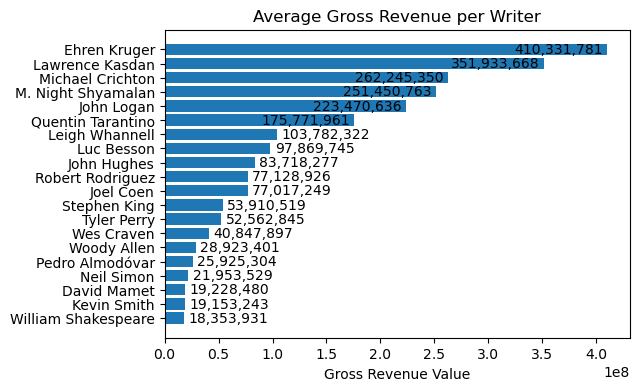

In [363]:
# Which writer is associated with movies with the greatest average gross revenue?

fltered_writers = df.groupby('writer').filter(lambda x: len(x) >= 10)
top20_writers_gross = (
    filtered_writers.groupby('writer')['gross']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_writers_gross = filtered_writers[filtered_writers['writer'].isin(top20_writers_gross)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_writers_gross,
                   'writer',
                   'gross',
                   xlabel = 'Gross Revenue Value',
                   title = 'Average Gross Revenue per Writer',
                   decimal_places = 0,
                   error_type = None,
                   text_offset = 0.01,
                   ax = ax)

plt.show()

In [365]:
# average gross revenue per writer list with std and sem

writer_gross_stats = filtered_top20_writers_gross.groupby('writer')['gross'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

writer_gross_stats_sort = writer_gross_stats.sort_values(by='mean', ascending=False)

print('Average Gross Revenue per Top 20 Writer (by gross)\n')
print(writer_gross_stats_sort)

Average Gross Revenue per Top 20 Writer (by gross)

                 writer  count          mean           std           sem
1          Ehren Kruger     10  4.103318e+08  4.389452e+08  1.388067e+08
6       Lawrence Kasdan     10  3.519337e+08  6.322606e+08  1.999384e+08
10     Michael Crichton     12  2.622453e+08  3.154480e+08  9.106199e+07
9    M. Night Shyamalan     11  2.514508e+08  1.826860e+08  5.508191e+07
4            John Logan     10  2.234706e+08  2.695010e+08  8.522371e+07
13    Quentin Tarantino     11  1.757720e+08  1.470829e+08  4.434716e+07
7        Leigh Whannell     11  1.037823e+08  6.299621e+07  1.899407e+07
8            Luc Besson     26  9.786974e+07  1.248682e+08  2.448867e+07
3           John Hughes     25  8.371828e+07  1.093305e+08  2.186610e+07
14     Robert Rodriguez     11  7.712893e+07  6.007833e+07  1.811430e+07
2             Joel Coen     13  7.701725e+07  8.241513e+07  2.285784e+07
15         Stephen King     31  5.391052e+07  9.404202e+07  1.689044e+07

A large std means that individual movie gross revenues for a writer fluctuate significantly.

For example, Lawrence Kasdan (std ≈ 632e6) has a much wider spread in gross revenue than Woody Allen (std ≈ 33e6), suggesting that Kasdan's films range from massive box-office hits to smaller earners.

A low SEM (e.g., Tyler Perry: SEM ≈ 5.63e6, Woody Allen: SEM ≈ 5.43e6) indicates higher confidence in the mean gross revenue estimate for that writer.

A high SEM (e.g., Lawrence Kasdan: SEM ≈ 200e6, Ehren Kruger: SEM ≈ 139e6) suggests that the mean is less stable, meaning that if you were to take another sample of movies, the mean might shift significantly.

### profit vs writer

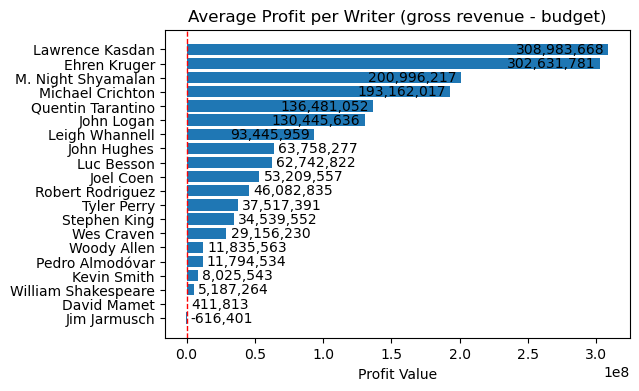

In [370]:
# which writers are associated with movies with the highest net revenue?

# compute the profit per writer
filtered_writers['profit'] = filtered_writers['gross'] - filtered_writers['budget']

# top 20 writers by profit
top20_writers_profit = (
    filtered_writers.groupby('writer')['profit']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)

# filter the top 20 writers by profit
filtered_top20_writers_profit = filtered_writers[filtered_writers['writer'].isin(top20_writers_profit)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_writers_profit,
                   'writer',
                   'profit',
                   xlabel = 'Profit Value',
                   title = 'Average Profit per Writer (gross revenue - budget)',
                   error_type = None,
                   decimal_places = 0,
                   text_offset = 0.01,
                   vline_x = 0,
                   ax = ax)

plt.show()

In [374]:
# Top 20 writers by average profit with std and sem

top20_writers_profit_stats = filtered_top20_writers_profit.groupby('writer')['profit'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

top20_writers_profit_stats_sort = top20_writers_profit_stats.sort_values(by='mean', ascending=False)

print('Top 20 Writers by Average Profit\n')
print(top20_writers_profit_stats_sort)

Top 20 Writers by Average Profit

                 writer  count          mean           std           sem
7       Lawrence Kasdan     10  3.089837e+08  5.638253e+08  1.782972e+08
1          Ehren Kruger     10  3.026318e+08  3.713699e+08  1.174375e+08
10   M. Night Shyamalan     11  2.009962e+08  1.768617e+08  5.332579e+07
11     Michael Crichton     12  1.931620e+08  3.141432e+08  9.068534e+07
13    Quentin Tarantino     11  1.364811e+08  1.182818e+08  3.566330e+07
5            John Logan     10  1.304456e+08  2.023961e+08  6.400325e+07
8        Leigh Whannell     11  9.344596e+07  7.011372e+07  2.114008e+07
4           John Hughes     25  6.375828e+07  1.082057e+08  2.164115e+07
9            Luc Besson     26  6.274282e+07  1.195835e+08  2.345225e+07
3             Joel Coen     13  5.320956e+07  7.117653e+07  1.974082e+07
14     Robert Rodriguez     11  4.608284e+07  5.795269e+07  1.747339e+07
16          Tyler Perry     11  3.751739e+07  1.912004e+07  5.764910e+06
15         Stephe

## star - analysis

In [375]:
# stars who have been in the most movies
df['star'].value_counts().head(20)

star
Nicolas Cage             43
Robert De Niro           41
Tom Hanks                41
Denzel Washington        37
Bruce Willis             34
Tom Cruise               34
Johnny Depp              33
Sylvester Stallone       32
John Travolta            31
Mel Gibson               29
Steve Martin             29
Kevin Costner            29
Adam Sandler             28
Ben Stiller              27
Jeff Bridges             27
Keanu Reeves             27
Robin Williams           27
Arnold Schwarzenegger    27
Eddie Murphy             27
Harrison Ford            26
Name: count, dtype: int64

In [377]:
# stars who have appeared in the fewest movies
df['star'].value_counts().tail(20)

star
Daniel Stern                 1
Jack Mulcahy                 1
Jimmy Smits                  1
Olivier Martinez             1
Pruitt Taylor Vince          1
Audie England                1
Álex Angulo                  1
Matt Frewer                  1
Predrag 'Miki' Manojlovic    1
Pascale Bussières            1
Clarence Williams III        1
Josh Hamilton                1
Hal Scardino                 1
Heather Matarazzo            1
Whitney Houston              1
Schuyler Fisk                1
Liesel Matthews              1
James Cromwell               1
Suzanna Love                 1
Siyabonga Mabaso             1
Name: count, dtype: int64

### score vs star

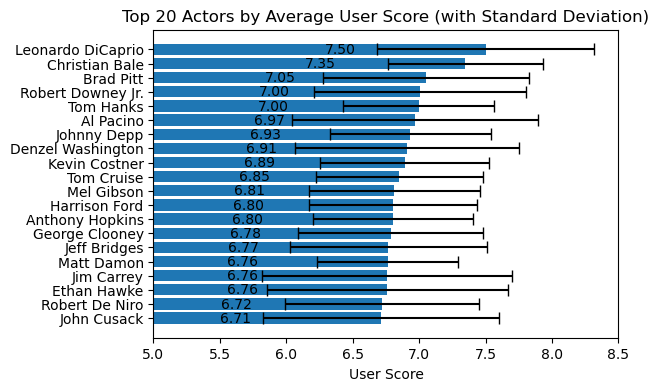

In [385]:
# which stars are in movies with the highest user scores?
# I will limit this to stars who have appearing in >= 20 movies. 

filtered_stars = df.groupby('star').filter(lambda x: len(x) >= 20)
top20_stars_score = (
    filtered_stars.groupby('star')['score']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_stars_scores = filtered_stars[filtered_stars['star'].isin(top20_stars_score)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_stars_scores,
                   'star',
                   'score',
                   xlabel = 'User Score',
                   title = 'Top 20 Actors by Average User Score (with Standard Deviation)',
                   error_type = 'std',
                   xlim = (5,8.5),
                   text_offset = 0.13,
                   ax = ax)

plt.show()

Note:
- the overall range of user scores in the dataset is 1.9 - 9.3
- the user rating is for the movie not the actor.  So this plot and std is an indirect metric.
- the very large std for each actor indicates how varied (and subjective) the user ratings are.  

### budget vs star

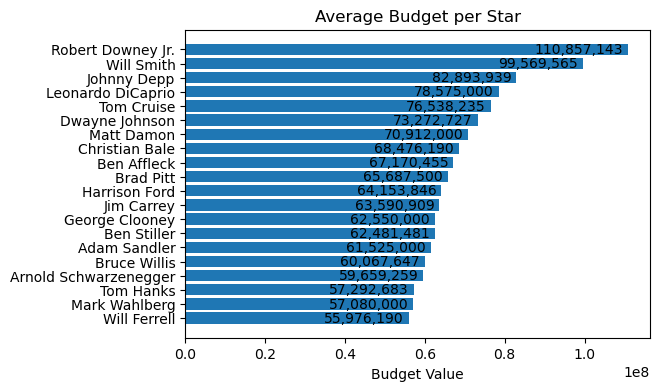

In [424]:
# Which stars are associated with the movies with largest budgets?

# filter stars that appeared in 20 or more movies
filtered_stars = df.groupby('star').filter(lambda x: len(x) >= 20)

# will plot only the top 20 stars based on budget
top20_stars_budget = (
    filtered_stars.groupby('star')['budget']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_stars_budget = filtered_stars[filtered_stars['star'].isin(top20_stars_budget)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_stars_budget,
                   'star',
                   'budget',
                   xlabel = 'Budget Value',
                   title = 'Average Budget per Star',
                   decimal_places = 0,
                   error_type = None,
                   text_offset = 0.011,
                   ax = ax)

plt.show()

In [425]:
# instead of showing error bars an the graph, I will print the list with
# the mean, std, and sem values.

stars_budget_stats = filtered_top20_stars_budget.groupby('star')['budget'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

stars_budget_stats_sorted = stars_budget_stats.sort_values(by='mean', ascending=False)

print('Average Budgets of the Top 20 Stars by Budget\n')
print(stars_budget_stats_sorted)

Average Budgets of the Top 20 Stars by Budget

                     star  count          mean           std           sem
15      Robert Downey Jr.     21  1.108571e+08  1.109082e+08  2.420215e+07
19             Will Smith     23  9.956957e+07  5.750247e+07  1.199009e+07
11            Johnny Depp     33  8.289394e+07  8.153007e+07  1.419256e+07
12      Leonardo DiCaprio     20  7.857500e+07  5.136384e+07  1.148530e+07
16             Tom Cruise     34  7.653824e+07  5.195062e+07  8.909457e+06
7          Dwayne Johnson     22  7.327273e+07  4.823571e+07  1.028389e+07
14             Matt Damon     25  7.091200e+07  3.645317e+07  7.290634e+06
6          Christian Bale     21  6.847619e+07  7.413273e+07  1.617709e+07
2             Ben Affleck     22  6.717045e+07  7.510569e+07  1.601259e+07
4               Brad Pitt     24  6.568750e+07  5.011288e+07  1.022925e+07
9           Harrison Ford     26  6.415385e+07  4.494058e+07  8.813572e+06
10             Jim Carrey     22  6.359091e+07  4.620

Large standard deviations for most stars indicates that individual movie budgets per star are widely spread out from their mean budget.

Large standard error of the mean values indicates that the mean budget value of a particular star isn't a reliable estimate of the true mean for that star.

### gross revenue vs star

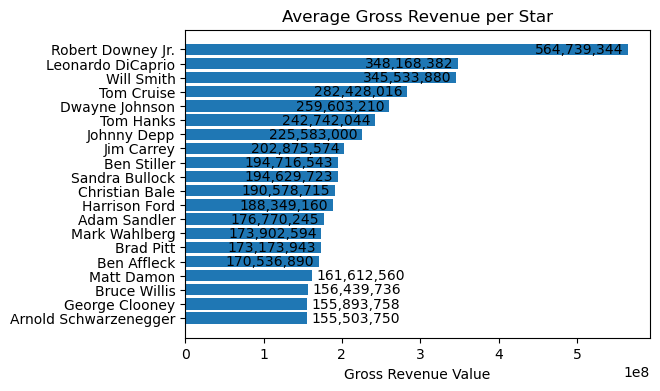

In [426]:
# Which star is associated with movies with the greatest average gross revenue?

fltered_stars = df.groupby('star').filter(lambda x: len(x) >= 20)
top20_stars_gross = (
    filtered_stars.groupby('star')['gross']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_stars_gross = filtered_stars[filtered_stars['star'].isin(top20_stars_gross)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_stars_gross,
                   'star',
                   'gross',
                   xlabel = 'Gross Revenue Value',
                   title = 'Average Gross Revenue per Star',
                   decimal_places = 0,
                   error_type = None,
                   text_offset = 0.01,
                   ax = ax)

plt.show()

In [427]:
# instead of showing error bars an the graph, I will print the list with
# the mean, std, and sem values.

stars_gross_stats = filtered_top20_stars_gross.groupby('star')['gross'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

stars_gross_stats_sorted = stars_gross_stats.sort_values(by='mean', ascending=False)

print('Average Gross Revenue of the Top 20 Stars by Gross\n')
print(stars_gross_stats_sorted)

Average Gross Revenue of the Top 20 Stars by Gross

                     star  count          mean           std           sem
15      Robert Downey Jr.     21  5.647393e+08  7.902670e+08  1.724504e+08
12      Leonardo DiCaprio     20  3.481684e+08  4.777783e+08  1.068345e+08
19             Will Smith     23  3.455339e+08  2.781484e+08  5.799795e+07
17             Tom Cruise     34  2.824280e+08  2.044469e+08  3.506236e+07
7          Dwayne Johnson     22  2.596032e+08  2.715206e+08  5.788838e+07
18              Tom Hanks     41  2.427420e+08  2.648254e+08  4.135878e+07
11            Johnny Depp     33  2.255830e+08  3.152970e+08  5.488616e+07
10             Jim Carrey     22  2.028756e+08  1.211253e+08  2.582400e+07
3             Ben Stiller     27  1.947165e+08  2.154792e+08  4.146898e+07
16         Sandra Bullock     22  1.946297e+08  2.657873e+08  5.666604e+07
6          Christian Bale     21  1.905787e+08  3.093845e+08  6.751324e+07
9           Harrison Ford     26  1.883492e+08  

Large standard deviations for most stars indicates that the individual movie gross revenue per star are widely spread out from their mean budget.

Large standard error of the mean values indicates that the mean gross value of a particular star isn't a reliable estimate of the true mean for that star.

### profit vs star

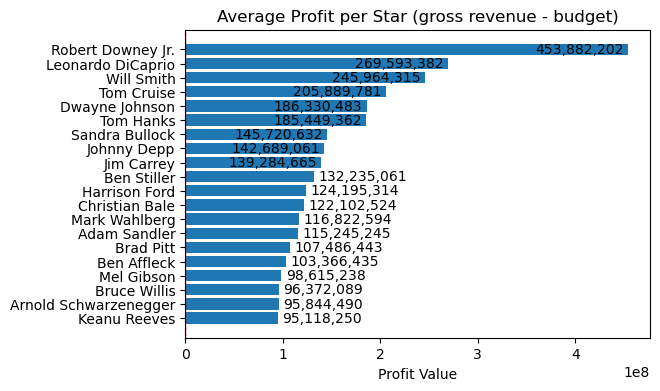

In [429]:
# which stars are associated with movies with the highest net revenue?

# compute the profit per star
filtered_stars['profit'] = filtered_stars['gross'] - filtered_stars['budget']

# top 20 stars by profit
top20_stars_profit = (
    filtered_stars.groupby('star')['profit']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)

# filter the top 20 stars by profit
filtered_top20_stars_profit = filtered_stars[filtered_stars['star'].isin(top20_stars_profit)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_stars_profit,
                   'star',
                   'profit',
                   xlabel = 'Profit Value',
                   title = 'Average Profit per Star (gross revenue - budget)',
                   error_type = None,
                   decimal_places = 0,
                   text_offset = 0.01,
                   vline_x = 0,
                   ax = ax)

plt.show()

In [430]:
# Top 20 stars by average profit with std and sem

top20_stars_profit_stats = filtered_top20_stars_profit.groupby('star')['profit'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

top20_stars_profit_stats_sort = top20_stars_profit_stats.sort_values(by='mean', ascending=False)

print('Top 20 Stars by Average Profit\n')
print(top20_stars_profit_stats_sort)

Top 20 Stars by Average Profit

                     star  count          mean           std           sem
15      Robert Downey Jr.     21  4.538822e+08  6.868543e+08  1.498839e+08
12      Leonardo DiCaprio     20  2.695934e+08  4.385259e+08  9.805736e+07
19             Will Smith     23  2.459643e+08  2.454560e+08  5.118111e+07
17             Tom Cruise     34  2.058898e+08  1.644650e+08  2.820552e+07
7          Dwayne Johnson     22  1.863305e+08  2.377996e+08  5.069905e+07
18              Tom Hanks     41  1.854494e+08  2.263242e+08  3.534591e+07
16         Sandra Bullock     22  1.457206e+08  2.545334e+08  5.426670e+07
10            Johnny Depp     33  1.426891e+08  2.438445e+08  4.244787e+07
9              Jim Carrey     22  1.392847e+08  1.113707e+08  2.374431e+07
3             Ben Stiller     27  1.322351e+08  1.793317e+08  3.451240e+07
8           Harrison Ford     26  1.241953e+08  1.657056e+08  3.249754e+07
6          Christian Bale     21  1.221025e+08  2.481208e+08  5.4144

Large standard deviations for most stars indicates that the individual movie profits per star are widely spread out from their mean budget.

Large standard error of the mean values indicates that the mean profit of a particular starring role isn't a reliable estimate of the true mean for that star.

## company - analysis

In [701]:
# movie production companies with the most movies produced

print('Top 20 companies for most productions\n')
df['company'].value_counts().head(20)

Top 20 companies for most productions



company
Universal Pictures           380
Warner Bros.                 347
Columbia Pictures            332
Paramount Pictures           321
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Dreamworks Pictures           76
Miramax                       74
Fox 2000 Pictures             63
Orion Pictures                60
Summit Entertainment          60
Castle Rock Entertainment     59
Lionsgate                     58
Fox Searchlight Pictures      57
Dimension Films               56
Screen Gems                   56
Name: count, dtype: int64

In [702]:
# movie production companies with the fewest movies produced

print('Bottom 20 companies, least productions\n')
df['company'].value_counts().tail(20)

Bottom 20 companies, least productions



company
Cineritino S.r.L.            1
Mundy Lane Entertainment     1
Dacia Films                  1
Bruin Grip Services          1
Pope Productions             1
Bad Bird Productions         1
Astoria Films                1
Dinamo Entertainment         1
Universal City Studios       1
ABC Productions              1
The Kushner-Locke Company    1
Balboa Entertainment         1
NDF International            1
Green Parrot                 1
Doug Liman Productions       1
Digital Image Associates     1
Kopelson Entertainment       1
Clavius Base                 1
Tim Burton Productions       1
PK 65 Films                  1
Name: count, dtype: int64

### score vs company

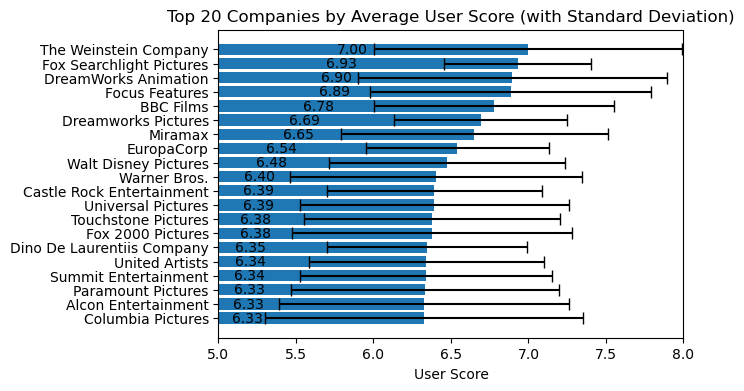

In [404]:
# which production companies have the highest average user scores?
# I will limit this to companies with >= 20 movies. 

filtered_company = df.groupby('company').filter(lambda x: len(x) >= 20)
top20_company_score = (
    filtered_company.groupby('company')['score']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_company_scores = filtered_company[filtered_company['company'].isin(top20_company_score)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_company_scores,
                   'company',
                   'score',
                   xlabel = 'User Score',
                   title = 'Top 20 Companies by Average User Score (with Standard Deviation)',
                   error_type = 'std',
                   xlim = (5,8),
                   text_offset = 0.148,
                   ax = ax)

plt.show()

In [408]:
# how many movies have been produced by The Weinstein Company?

company_name = "The Weinstein Company"
count = df[df['company'] == company_name].shape[0]
print(f'Number of records for {company_name}: {count}')

Number of records for The Weinstein Company: 30


The order here is a bit surprising.  However, the standard deviation is quite large for all companies, meaning that the individual user scores vary widely. 

Fox Searchlight Pictures has the lowest standard deviation, and also in the top 20 of movies produced.  This suggests that their movies are the most consistent in terms of user appreciation.  

### budget vs company

In [703]:
# top 20 production companies for total budget 

top20_company_total_budget = (
    df.groupby('company')['budget']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)
print('Top 20 Companies for Total Budget\n')
print(top20_company_total_budget.apply(lambda x: f'{x:,.0f}'))

Top 20 Companies for Total Budget

company
Warner Bros.                     20,450,182,000
Universal Pictures               17,140,451,001
Columbia Pictures                16,154,107,000
Paramount Pictures               14,511,450,000
Twentieth Century Fox            12,030,600,000
Walt Disney Pictures             10,870,700,000
New Line Cinema                   6,023,200,000
Touchstone Pictures               4,679,700,000
Metro-Goldwyn-Mayer (MGM)         4,097,250,000
Dreamworks Pictures               3,976,700,000
DreamWorks Animation              3,344,000,000
Summit Entertainment              2,775,269,000
Marvel Studios                    2,664,000,000
TriStar Pictures                  2,449,965,000
Fox 2000 Pictures                 2,410,500,000
Lionsgate                         2,105,800,000
Walt Disney Animation Studios     2,086,000,000
Castle Rock Entertainment         1,930,500,000
Pixar Animation Studios           1,756,000,000
Miramax                           1,631,247,7

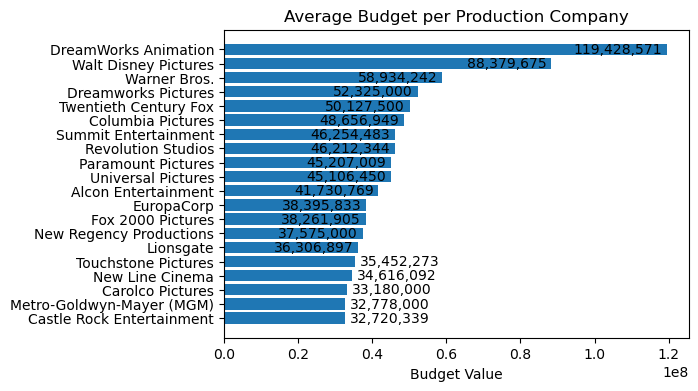

In [411]:
# Which companies supply the largest average budgets per movie?
# Here I am considering only those companies with at least 20 productions. 

# filter companies that produced 20 or more movies
filtered_company = df.groupby('company').filter(lambda x: len(x) >= 20)

# will plot only the top 20 stars based on budget
top20_company_budget = (
    filtered_company.groupby('company')['budget']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_company_budget = filtered_company[filtered_company['company'].isin(top20_company_budget)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_company_budget,
                   'company',
                   'budget',
                   xlabel = 'Budget Value',
                   title = 'Average Budget per Production Company',
                   decimal_places = 0,
                   error_type = None,
                   text_offset = 0.011,
                   ax = ax)

plt.show()

DreamWorks Animation has the highest average budget per movie.  Considering that this produciton company has produced only animation films, this ranking and value suggests that I overlooked this genre in the analysis of the genre feature.  I filtered by top 5 genres by number of records and not budget.  

DreamWorks Animation is owned by Universal Pictures (and NBCUniversal).

In [413]:
# instead of showing error bars an the graph, I will print the list with
# the mean, std, and sem values.

company_budget_stats = filtered_top20_company_budget.groupby('company')['budget'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

company_budget_stats_sorted = company_budget_stats.sort_values(by='mean', ascending=False)

print('Average Budgets of the Top 20 Production Companies by Budget\n')
print(company_budget_stats_sorted)

Average Budgets of the Top 20 Production Companies by Budget

                      company  count          mean           std           sem
4        DreamWorks Animation     28  1.194286e+08  3.631899e+07  6.863643e+06
18       Walt Disney Pictures    123  8.837967e+07  7.853766e+07  7.081502e+06
19               Warner Bros.    347  5.893424e+07  5.236807e+07  2.811265e+06
5         Dreamworks Pictures     76  5.232500e+07  3.613483e+07  4.144950e+06
16      Twentieth Century Fox    240  5.012750e+07  4.472180e+07  2.886780e+06
3           Columbia Pictures    332  4.865695e+07  4.186992e+07  2.297910e+06
14       Summit Entertainment     60  4.625448e+07  2.976672e+07  3.842867e+06
13         Revolution Studios     32  4.621234e+07  2.017780e+07  3.566964e+06
12         Paramount Pictures    321  4.520701e+07  4.510620e+07  2.517583e+06
17         Universal Pictures    380  4.510645e+07  4.001144e+07  2.052543e+06
0         Alcon Entertainment     26  4.173077e+07  3.331853e+07  6.5

In [631]:
# Levene's test for equal variance (homoscedasticity)

levenes_test(filtered_top20_company_budget, 'company', 'budget')

Levene's test p-value: 0.0000


In [633]:
# check effect size

var_budget_company = filtered_top20_company_budget.groupby('company')['budget'].var()
print(var_budget_company)

company
Alcon Entertainment          1.110125e+15
Carolco Pictures             5.232267e+14
Castle Rock Entertainment    7.255799e+14
Columbia Pictures            1.753090e+15
DreamWorks Animation         1.319069e+15
Dreamworks Pictures          1.305726e+15
EuropaCorp                   1.175947e+15
Fox 2000 Pictures            9.022085e+14
Lionsgate                    9.793200e+14
Metro-Goldwyn-Mayer (MGM)    1.393377e+15
New Line Cinema              1.202791e+15
New Regency Productions      8.663532e+14
Paramount Pictures           2.034569e+15
Revolution Studios           4.071435e+14
Summit Entertainment         8.860577e+14
Touchstone Pictures          8.987263e+14
Twentieth Century Fox        2.000040e+15
Universal Pictures           1.600915e+15
Walt Disney Pictures         6.168164e+15
Warner Bros.                 2.742415e+15
Name: budget, dtype: float64


The Levene's test of p-value < 0.05 means that the null hypothesis (the data is homoscedastic) is rejected, meaning that there is heteroscedasticity in the data.  

There is considerable variance in the budget values per company.

In [635]:
# run a Welch's ANOVA to determine if any pairs of companies are 
# statstically distinct for budget.

welchs_anova(filtered_top20_company_budget, 'company', 'budget')

    Source  ddof1       ddof2          F         p-unc       np2
0  company     19  407.952913  13.339687  2.099904e-32  0.093922


The ANOVA indicates that at least one pair of companies are statistically distinct with regards to budget.  The partial eta squared value indicates that the top 20 companines account for 9.3% of the variance in the budget values.  

In [637]:
# Games-Howell posthoc test to determine which companies are statsticially 
# different with regards to average budget.

posthoc_company_budget = posthoc_test(filtered_top20_company_budget, 'company', 'budget')
print(posthoc_company_budget)

Unique values in independent variable:
 ['Warner Bros.' 'Columbia Pictures' 'Paramount Pictures'
 'Universal Pictures' 'Metro-Goldwyn-Mayer (MGM)' 'Twentieth Century Fox'
 'Walt Disney Pictures' 'New Line Cinema' 'Touchstone Pictures'
 'Carolco Pictures' 'Castle Rock Entertainment' 'New Regency Productions'
 'Fox 2000 Pictures' 'Dreamworks Pictures' 'Summit Entertainment'
 'DreamWorks Animation' 'Alcon Entertainment' 'Revolution Studios'
 'EuropaCorp' 'Lionsgate']

                         A                          B       mean(A)  \
0      Alcon Entertainment           Carolco Pictures  4.173077e+07   
1      Alcon Entertainment  Castle Rock Entertainment  4.173077e+07   
2      Alcon Entertainment          Columbia Pictures  4.173077e+07   
3      Alcon Entertainment       DreamWorks Animation  4.173077e+07   
4      Alcon Entertainment        Dreamworks Pictures  4.173077e+07   
..                     ...                        ...           ...   
185  Twentieth Century Fox       

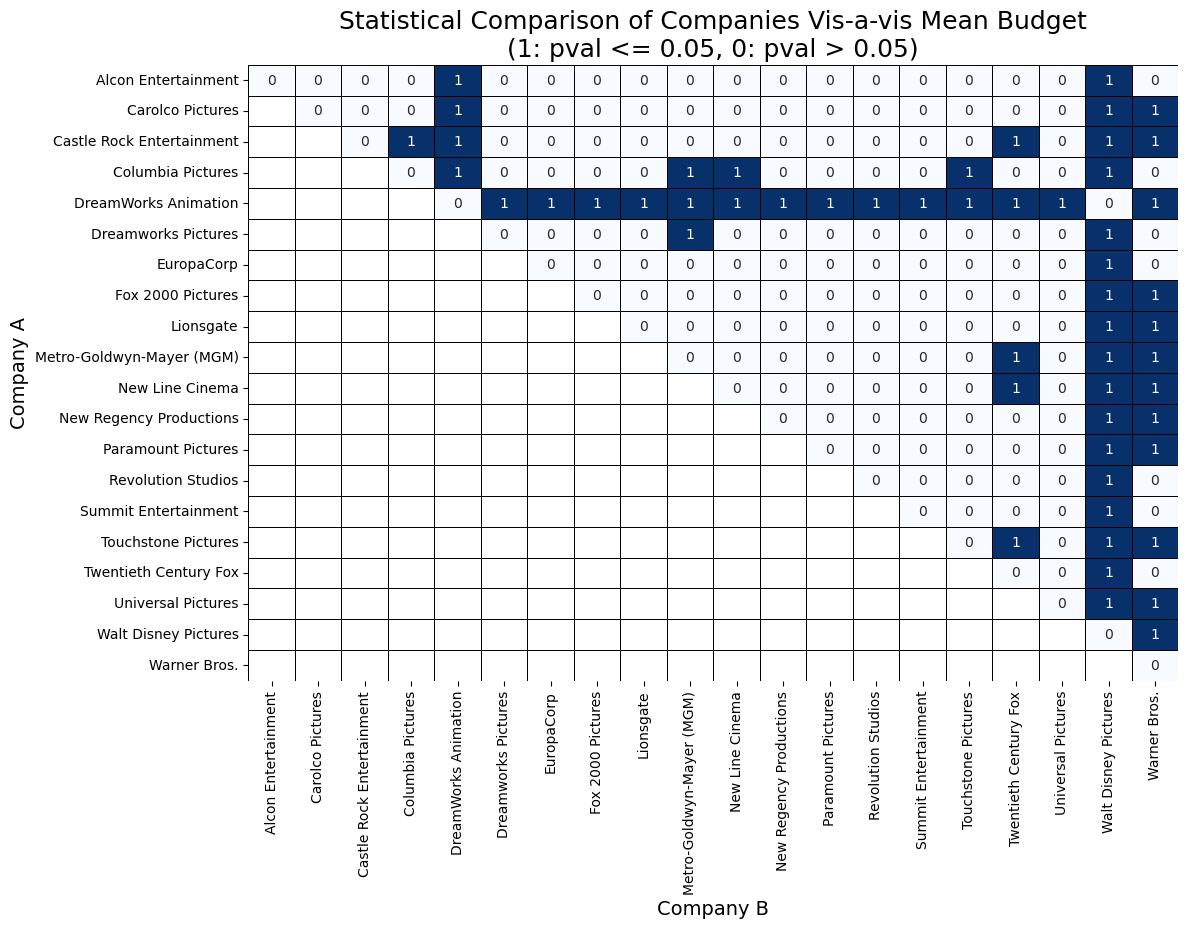

In [640]:
# Without expanding the data, I see some pvals < 0.05.  
# visualize the companies that are stastically distince vis-a-vis budget.  

# ensure that both axes are the same 
all_companies = sorted(
    set(posthoc_company_budget['A'])
    .union(set(posthoc_company_budget['B']))
)

# pivot table
sig_matrix_company_budget = (
    posthoc_company_budget
    .pivot(index='A', columns='B', values='pval')
    .reindex(index=all_companies, columns=all_companies, fill_value=1)
    .map(lambda x: 1 if x <= 0.05 else 0)
)

# ensure that the diagonal values = 0
np.fill_diagonal(sig_matrix_company_budget.values, 0)

# mask the lower diagonal
mask = np.tril(np.ones_like(sig_matrix_company_budget, dtype=bool), k=-1)

# plot
plt.figure(figsize=(12,8))
sns.heatmap(sig_matrix_company_budget, cmap='Blues', cbar=False, linewidth=0.5,
            linecolor='black', annot=True, fmt='d', mask=mask)

plt.title('Statistical Comparison of Companies Vis-a-vis Mean Budget\n(1: pval <= 0.05, 0: pval > 0.05)', fontsize=18)
plt.xlabel('Company B', fontsize=14)
plt.ylabel('Company A', fontsize=14)

plt.show()

DreamWorks Animation not only has the largets average budget per movie, but that value is statistically significantly greater than all other "top 20" companies, except Walt Disney Pictures.  The same can be said (in reverse) for Walt Disney Pictures vs Dreamworks Animation.  

### gross revenue vs company

In [700]:
# top 20 production companies for total gross revenue 

top20_company_total_gross = (
    df.groupby('company')['gross']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)
print('Top 20 Companies for Total Gross Revenue\n')
print(top20_company_total_gross.apply(lambda x: f'{x:,.0f}'))

Top 20 Companies for Total Gross Revenue

company
Warner Bros.                     56,674,348,210
Universal Pictures               52,573,215,389
Columbia Pictures                43,008,941,346
Paramount Pictures               40,522,220,356
Twentieth Century Fox            40,257,053,857
Walt Disney Pictures             36,327,887,792
New Line Cinema                  19,883,797,684
Marvel Studios                   15,065,592,411
DreamWorks Animation             11,873,612,858
Touchstone Pictures              11,795,832,638
Dreamworks Pictures              11,635,441,081
Metro-Goldwyn-Mayer (MGM)         9,297,990,179
Summit Entertainment              8,373,718,838
Pixar Animation Studios           7,886,344,526
Fox 2000 Pictures                 7,443,502,667
Lucasfilm                         7,185,352,192
Walt Disney Animation Studios     6,751,509,051
Lionsgate                         6,078,452,519
TriStar Pictures                  5,667,436,463
Screen Gems                       4,11

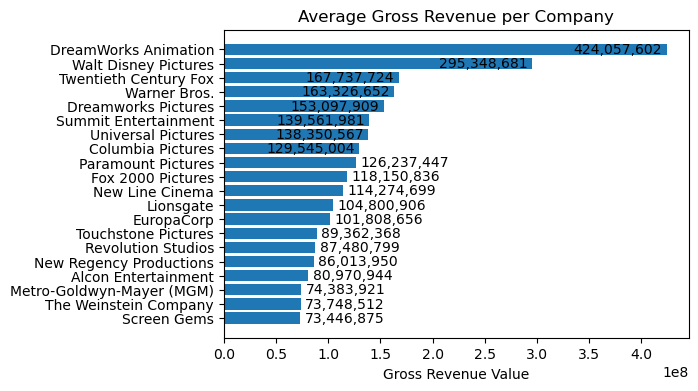

In [417]:
# Which companies produced movies with the greatest average gross revenue?
# Here I am considering only companies with at least 20 productions.  

fltered_company = df.groupby('company').filter(lambda x: len(x) >= 20)
top20_company_gross = (
    filtered_company.groupby('company')['gross']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)
filtered_top20_company_gross = filtered_company[filtered_company['company'].isin(top20_company_gross)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_company_gross,
                   'company',
                   'gross',
                   xlabel = 'Gross Revenue Value',
                   title = 'Average Gross Revenue per Company',
                   decimal_places = 0,
                   error_type = None,
                   text_offset = 0.01,
                   ax = ax)

plt.show()

In [431]:
# instead of showing error bars an the graph, I will print the list with
# the mean, std, and sem values.

company_gross_stats = filtered_top20_company_gross.groupby('company')['gross'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

company_gross_stats_sorted = company_gross_stats.sort_values(by='mean', ascending=False)

print('Average Gross Revenue of the Top 20 Companies by Gross\n')
print(company_gross_stats_sorted)

Average Gross Revenue of the Top 20 Companies by Gross

                      company  count          mean           std           sem
2        DreamWorks Animation     28  4.240576e+08  1.883665e+08  3.559792e+07
18       Walt Disney Pictures    123  2.953487e+08  3.531608e+08  3.184344e+07
16      Twentieth Century Fox    240  1.677377e+08  2.778332e+08  1.793406e+07
19               Warner Bros.    347  1.633267e+08  2.294296e+08  1.231642e+07
3         Dreamworks Pictures     76  1.530979e+08  1.732493e+08  1.987305e+07
13       Summit Entertainment     60  1.395620e+08  1.726503e+08  2.228906e+07
17         Universal Pictures    380  1.383506e+08  2.030596e+08  1.041674e+07
1           Columbia Pictures    332  1.295450e+08  1.747718e+08  9.591851e+06
10         Paramount Pictures    321  1.262374e+08  1.713428e+08  9.563423e+06
5           Fox 2000 Pictures     63  1.181508e+08  1.232211e+08  1.552440e+07
8             New Line Cinema    174  1.142747e+08  1.774902e+08  1.345550e

In [641]:
# Levene's test for variance in the data

levenes_test(filtered_top20_company_gross, 'company', 'gross')

Levene's test p-value: 0.0000


In [642]:
# check effect size

var_gross_company = filtered_top20_company_gross.groupby('company')['gross'].var()

print(var_gross_company)

company
Alcon Entertainment          5.715254e+15
Columbia Pictures            3.054519e+16
DreamWorks Animation         3.548194e+16
Dreamworks Pictures          3.001531e+16
EuropaCorp                   1.617845e+16
Fox 2000 Pictures            1.518345e+16
Lionsgate                    2.577524e+16
Metro-Goldwyn-Mayer (MGM)    2.847415e+16
New Line Cinema              3.150278e+16
New Regency Productions      1.285207e+16
Paramount Pictures           2.935836e+16
Revolution Studios           3.739775e+15
Screen Gems                  3.995258e+15
Summit Entertainment         2.980814e+16
The Weinstein Company        1.188220e+16
Touchstone Pictures          1.030364e+16
Twentieth Century Fox        7.719128e+16
Universal Pictures           4.123319e+16
Walt Disney Pictures         1.247226e+17
Warner Bros.                 5.263792e+16
Name: gross, dtype: float64


The Levene's test indicates heteroscedasticity.

The effect of the variance is quite large indicating that the mean gross revenue values differ substantially, widely spread out from the mean, within company groups.

In [643]:
# Welch's ANOVA to determine if any companies are statistically different for 
# mean gross revenue

welchs_anova(filtered_top20_company_gross, 'company', 'gross')

    Source  ddof1      ddof2         F         p-unc      np2
0  company     19  421.85589  10.43553  1.982183e-25  0.06597


At least one pair of companies are statstically different with regards to gross revenue.  The "top 20" companies account for 6.6% of variance in the mean gross revenue values.  

In [645]:
# Games-Howell posthoc test to determine which companies are stastically distinct 
# for mean gross revenue

posthoc_company_gross = posthoc_test(filtered_top20_company_gross, 'company', 'gross')
print(posthoc_company_gross)

Unique values in independent variable:
 ['Warner Bros.' 'Columbia Pictures' 'Paramount Pictures'
 'Universal Pictures' 'Metro-Goldwyn-Mayer (MGM)' 'Twentieth Century Fox'
 'Walt Disney Pictures' 'New Line Cinema' 'Touchstone Pictures'
 'New Regency Productions' 'Fox 2000 Pictures' 'Dreamworks Pictures'
 'Summit Entertainment' 'DreamWorks Animation' 'Screen Gems'
 'Alcon Entertainment' 'Revolution Studios' 'EuropaCorp'
 'The Weinstein Company' 'Lionsgate']

                         A                     B       mean(A)       mean(B)  \
0      Alcon Entertainment     Columbia Pictures  8.097094e+07  1.295450e+08   
1      Alcon Entertainment  DreamWorks Animation  8.097094e+07  4.240576e+08   
2      Alcon Entertainment   Dreamworks Pictures  8.097094e+07  1.530979e+08   
3      Alcon Entertainment            EuropaCorp  8.097094e+07  1.018087e+08   
4      Alcon Entertainment     Fox 2000 Pictures  8.097094e+07  1.181508e+08   
..                     ...                   ...           

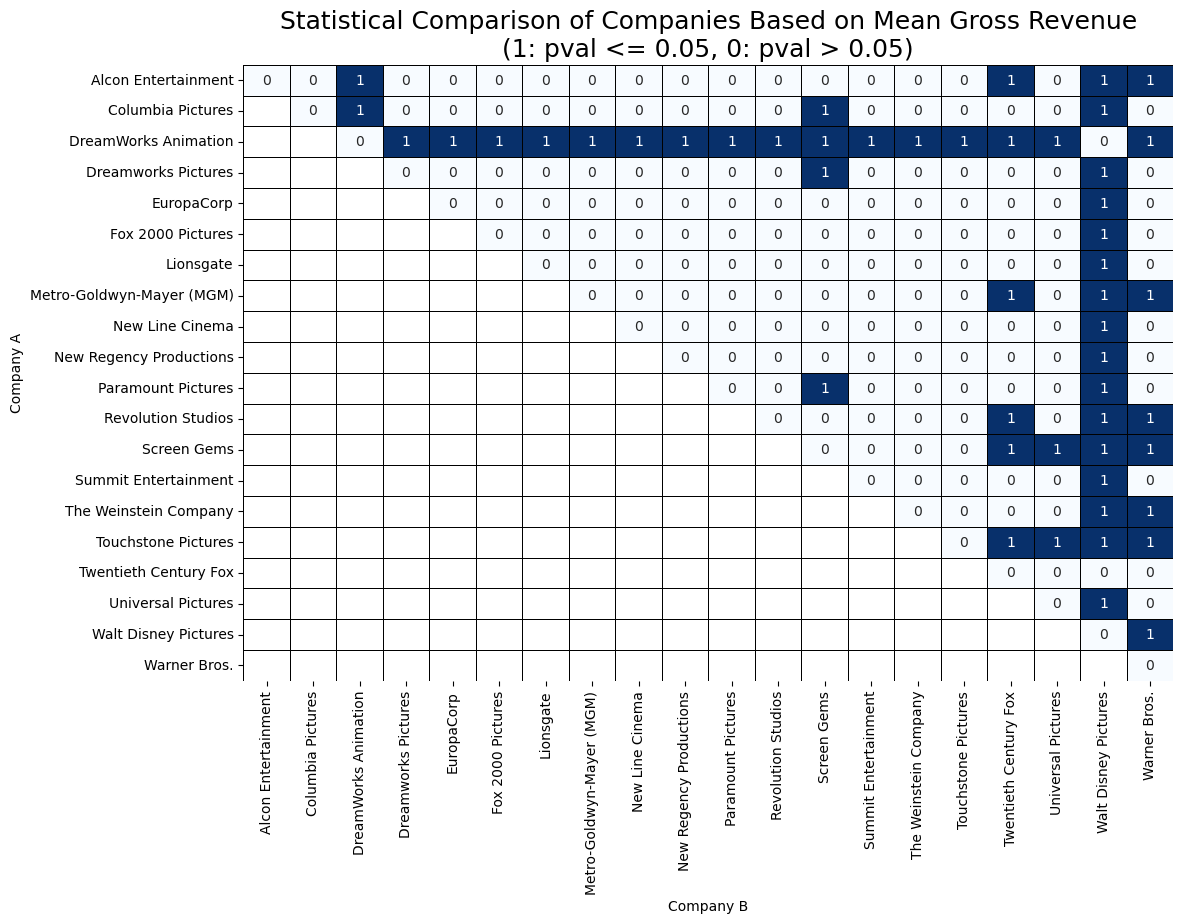

In [651]:
# There are some p-values < 0.05.  So, I will visualize which companies are distinct
# with a pivot table

# ensure that both axes are the same
all_companies = sorted(
    set(posthoc_company_gross['A'])
    .union(set(posthoc_company_gross['B']))
)

# pivot table
sig_matrix_company_gross = (
    posthoc_company_gross
    .pivot(index='A', columns='B', values='pval')
    .reindex(index=all_companies, columns=all_companies, fill_value=1)
    .map(lambda x: 1 if x <= 0.05 else 0)
)

# set diagonal values = 0
np.fill_diagonal(sig_matrix_company_gross.values, 0)

# mask the lower triangle
mask = np.tril(np.ones_like(sig_matrix_company_gross, dtype=bool), k=-1)

# plot
plt.figure(figsize=(12,8))
sns.heatmap(sig_matrix_company_gross, cmap='Blues', cbar=False, linewidth=0.5,
            linecolor='black', annot=True, fmt='d', mask=mask)

plt.title('Statistical Comparison of Companies Based on Mean Gross Revenue\n(1: pval <= 0.05, 0: pval > 0.05)', fontsize=18)
plt.xlabel('Company B')
plt.ylabel('Company A')

plt.show()
                       

Similar results for statistical significance compared to companies vs mean budget, with regard to DreamWorks Animation and Walt Disney Pictures.

### profit vs company

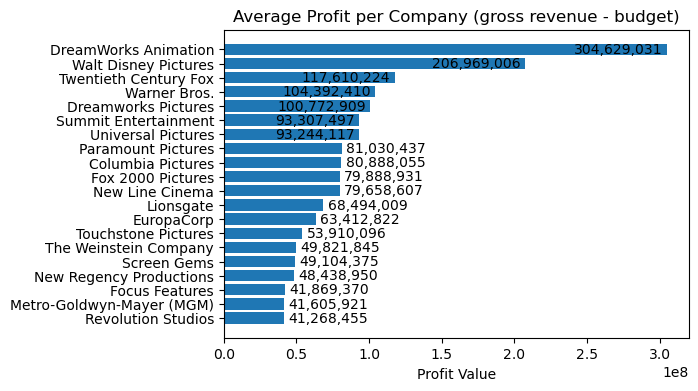

In [656]:
# which companies produced movies with the highest net revenue?

# compute the profit per company
filtered_company['profit'] = filtered_company['gross'] - filtered_company['budget']

# top 20 stars by profit
top20_company_profit = (
    filtered_company.groupby('company')['profit']
    .mean()
    .nlargest(20)
    .index
    .tolist()
)

# filter the top 20 stars by profit
filtered_top20_company_profit = filtered_company[filtered_company['company'].isin(top20_company_profit)]

# plot
fig, ax = plt.subplots(figsize=(6,4))
barplot_with_error(filtered_top20_company_profit,
                   'company',
                   'profit',
                   xlabel = 'Profit Value',
                   title = 'Average Profit per Company (gross revenue - budget)',
                   error_type = None,
                   decimal_places = 0,
                   text_offset = 0.01,
                   ax = ax)

plt.show()

In [657]:
# Top 20 companies by average profit including std and sem

top20_company_profit_stats = filtered_top20_company_profit.groupby('company')['profit'].agg(
    count='size',mean='mean',std='std',sem='sem').reset_index()

top20_company_profit_stats_sort = top20_company_profit_stats.sort_values(by='mean', ascending=False)

print('Top 20 Companies by Average Profit\n')
print(top20_company_profit_stats_sort)

Top 20 Companies by Average Profit

                      company  count          mean           std           sem
1        DreamWorks Animation     28  3.046290e+08  1.714589e+08  3.240270e+07
18       Walt Disney Pictures    123  2.069690e+08  2.958038e+08  2.667173e+07
16      Twentieth Century Fox    240  1.176102e+08  2.496689e+08  1.611606e+07
19               Warner Bros.    347  1.043924e+08  1.968577e+08  1.056787e+07
2         Dreamworks Pictures     76  1.007729e+08  1.470532e+08  1.686815e+07
13       Summit Entertainment     60  9.330750e+07  1.578815e+08  2.038241e+07
17         Universal Pictures    380  9.324412e+07  1.821871e+08  9.346003e+06
10         Paramount Pictures    321  8.103044e+07  1.403249e+08  7.832172e+06
0           Columbia Pictures    332  8.088806e+07  1.446162e+08  7.936844e+06
5           Fox 2000 Pictures     63  7.988893e+07  1.038808e+08  1.308775e+07
8             New Line Cinema    174  7.965861e+07  1.585318e+08  1.201826e+07
6               

In [658]:
# Levene's test for variance 

levenes_test(filtered_top20_company_profit, 'company', 'profit')

Levene's test p-value: 0.0000


In [659]:
# check effect size

var_profit_company = filtered_top20_company_profit.groupby('company')['profit'].var()
print(var_profit_company)

company
Columbia Pictures            2.091384e+16
DreamWorks Animation         2.939817e+16
Dreamworks Pictures          2.162463e+16
EuropaCorp                   1.443274e+16
Focus Features               7.225756e+15
Fox 2000 Pictures            1.079122e+16
Lionsgate                    1.935936e+16
Metro-Goldwyn-Mayer (MGM)    1.904708e+16
New Line Cinema              2.513233e+16
New Regency Productions      8.429193e+15
Paramount Pictures           1.969108e+16
Revolution Studios           2.705752e+15
Screen Gems                  3.135574e+15
Summit Entertainment         2.492656e+16
The Weinstein Company        1.046427e+16
Touchstone Pictures          7.924378e+15
Twentieth Century Fox        6.233455e+16
Universal Pictures           3.319216e+16
Walt Disney Pictures         8.749991e+16
Warner Bros.                 3.875294e+16
Name: profit, dtype: float64


The Levene's test indicates heteroscedasticity.

The effect of the variance is quite large indicating that the mean profit values differ substantially, widely spread out from the mean, within company groups.

In [661]:
# Welch's ANOVA to determine if any pairs of companies are statistically distinct 
# for mean profit.

welchs_anova(filtered_top20_company_profit, 'company', 'profit')

    Source  ddof1       ddof2         F         p-unc       np2
0  company     19  443.688515  7.634563  3.724584e-18  0.050181


At least one pair of companies are statstically different with regards to mean profit. The "top 20" companies account for ~5% of variance in the mean profit values.

In [663]:
# Games-Howell posthoc test to determine which pairs of companies are statistically 
# distinct for mean profit.  

posthoc_company_profit = posthoc_test(filtered_top20_company_profit, 'company', 'profit')
print(posthoc_company_profit)

Unique values in independent variable:
 ['Warner Bros.' 'Columbia Pictures' 'Paramount Pictures'
 'Universal Pictures' 'Metro-Goldwyn-Mayer (MGM)' 'Twentieth Century Fox'
 'Walt Disney Pictures' 'New Line Cinema' 'Touchstone Pictures'
 'New Regency Productions' 'Fox 2000 Pictures' 'Dreamworks Pictures'
 'Summit Entertainment' 'DreamWorks Animation' 'Screen Gems'
 'Revolution Studios' 'EuropaCorp' 'Focus Features'
 'The Weinstein Company' 'Lionsgate']

                         A                     B       mean(A)       mean(B)  \
0        Columbia Pictures  DreamWorks Animation  8.088806e+07  3.046290e+08   
1        Columbia Pictures   Dreamworks Pictures  8.088806e+07  1.007729e+08   
2        Columbia Pictures            EuropaCorp  8.088806e+07  6.341282e+07   
3        Columbia Pictures        Focus Features  8.088806e+07  4.186937e+07   
4        Columbia Pictures     Fox 2000 Pictures  8.088806e+07  7.988893e+07   
..                     ...                   ...           ...  

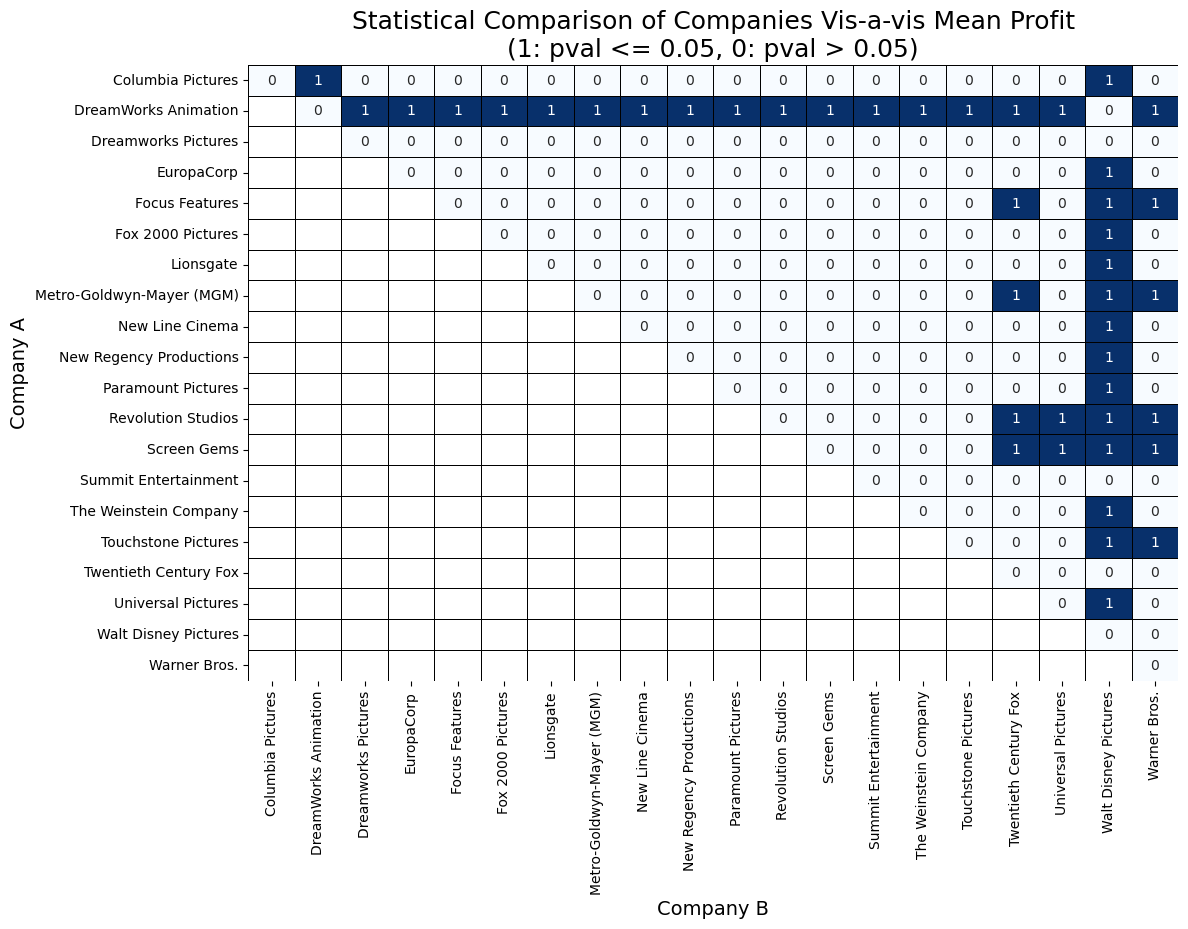

In [664]:
# There are some pvals < 0.05, so will use a pivot table to visually communicate
# which of the "top 20" companies are statistically distinct with regards to mean profit.

# ensure that both axes are the same 
all_companies = sorted(
    set(posthoc_company_profit['A'])
    .union(set(posthoc_company_profit['B']))
)

# pivot table
sig_matrix_company_profit = (
    posthoc_company_profit
    .pivot(index='A', columns='B', values='pval')
    .reindex(index=all_companies, columns=all_companies, fill_value=1)
    .map(lambda x: 1 if x <= 0.05 else 0)
)

# ensure that the diagonal values = 0
np.fill_diagonal(sig_matrix_company_profit.values, 0)

# mask the lower diagonal
mask = np.tril(np.ones_like(sig_matrix_company_profit, dtype=bool), k=-1)

# plot
plt.figure(figsize=(12,8))
sns.heatmap(sig_matrix_company_profit, cmap='Blues', cbar=False, linewidth=0.5,
            linecolor='black', annot=True, fmt='d', mask=mask)

plt.title('Statistical Comparison of Companies Vis-a-vis Mean Profit\n(1: pval <= 0.05, 0: pval > 0.05)', fontsize=18)
plt.xlabel('Company B', fontsize=14)
plt.ylabel('Company A', fontsize=14)

plt.show()

DreamWorks Animation and Walt Disney Pictures are statistically tied for first place for mean profit in this list of production companies.  

## runtime - analysis 

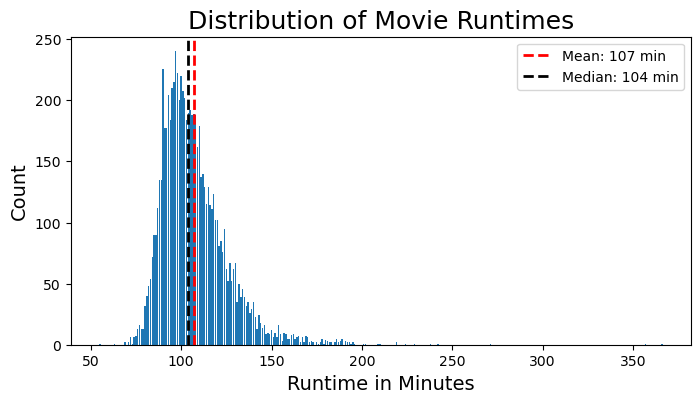

In [685]:
runtime_counts = df['runtime'].value_counts().sort_index()

# calculate the mean and median values
mean_runtime = df['runtime'].mean()
median_runtime = df['runtime'].median()

# plot
plt.figure(figsize=(8,4))
plt.bar(runtime_counts.index, runtime_counts.values)
plt.xlabel('Runtime in Minutes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Movie Runtimes', fontsize=18)

# add mean an median lines
plt.axvline(mean_runtime, 
            color='red', 
            linestyle='--', 
            linewidth=2, 
            label=f'Mean: {mean_runtime:.0f} min')
plt.axvline(median_runtime, 
            color='Black', 
            linestyle='--', 
            linewidth=2, 
            label=f'Median: {median_runtime:.0f} min')

plt.legend()
plt.show()

### score vs runtime

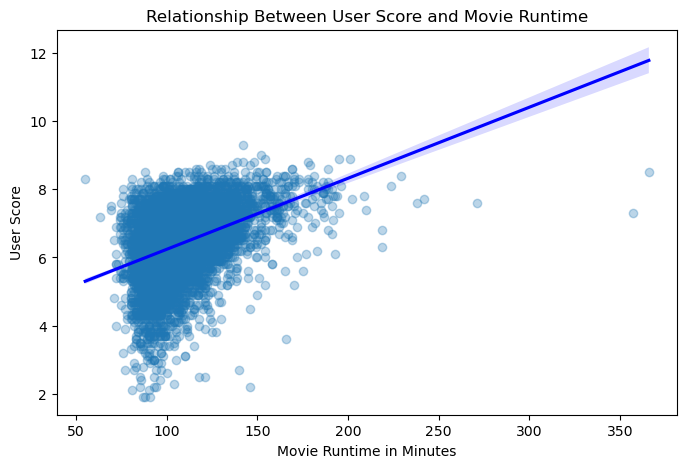

In [689]:
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='runtime', y='score', scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.xlabel('Movie Runtime in Minutes')
plt.ylabel('User Score')
plt.title('Relationship Between User Score and Movie Runtime')
plt.show()

In [693]:
# is there a preference for long or short movies, per se?  

print('Pearson correlation for user score vs movie runtime\n')
df[['runtime','score']].corr(method='pearson')

Pearson correlation for user score vs movie runtime



runtime     score
runtime  1.000000  0.399387
score    0.399387  1.000000

The positive slope of the regression plot line suggests a trend in higher user scores for longer movies.  However, the datapoints are not tightly clustered around the line and the correlation coefficient is low (~0.4), both indicating a weak relationship. 

## correlation map of selected features

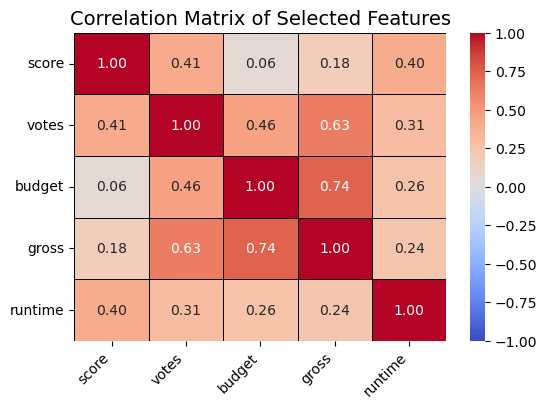

In [731]:
# select features for a heatmap
df_corr = df[['score','votes','budget','gross','runtime']]

# compute the correlation matrix
corr_matrix = df_corr.corr()

# plot
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, linewidth=0.5, linecolor='black')

plt.title('Correlation Matrix of Selected Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Interpretation of the correlation matrix results:
(a correlation scale is provided in the next cell, below)

Strong correlations
- votes vs gross - More people who watch a movie (higher gross revenue) leads to more votes.
- gross vs budget - Movies that cost more to produce tend to generate more gross revenue.

Moderate correlation
- votes vs score - people are more likely to vote for a movie that they like
- budget vs votes - while there isn't substantial correlation between budget and score, there is a more substantial correlation between budget and votes.  People tend to vote for the bigger, blockbuster productions.
- runtime vs score - as shown above, there seems to be a moderate preference for longer movies

Weak or no correlation (of note)
- budget vs score - this is interesting since I was expecting that higher budget movies would get better scores.
- budget vs runtime - I would have expected a higher correlation as more of something seems to require more overhead.  However, this is likely effected by editing and not just the duration of time that actors spend on set, number of sets that need to be built, etc.  



Correlation scale:
- 0.00 → No correlation
- 0.01 - 0.29 → Weak correlation
- 0.30 - 0.49 → Moderate correlation
- 0.50 - 0.69 → Strong correlation
- 0.70 - 0.89 → Very strong correlation
- 0.90 - 1.00 → Near-perfect correlation

- positive correlation - one variable increases as the other variable increases
- negative correlation - one variable decreases as the other variable increases